In [ ]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install(c('qvalue','plot3D','ggplot2','pheatmap','cowplot',
                      'cluster', 'NbClust', 'fastICA', 'NMF','matrixStats',
                      'Rtsne', 'mosaic', 'knitr', 'genomation',
                      'ggbio', 'Gviz', 'DESeq2', 'RUVSeq',
                      'gProfileR', 'ggfortify', 'corrplot',
                      'gage', 'EDASeq', 'citr', 'formatR',
                      'svglite', 'Rqc', 'ShortRead', 'QuasR',
                      'methylKit','FactoMineR', 'iClusterPlus',
                      'enrichR','caret','xgboost','glmnet',
                      'DALEX','kernlab','pROC','nnet','RANN',
                      'ranger','GenomeInfoDb', 'GenomicRanges',
                      'GenomicAlignments', 'ComplexHeatmap', 'circlize', 
                      'rtracklayer', 'BSgenome.Hsapiens.UCSC.hg38',
                      'BSgenome.Hsapiens.UCSC.hg19','tidyr',
                      'AnnotationHub', 'GenomicFeatures', 'normr',
                      'MotifDb', 'TFBSTools', 'rGADEM', 'JASPAR2018'
                     ))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.1 (2021-08-10)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'ggplot2' 'cluster' 'knitr' 'svglite' 'nnet' 'tidyr'”
Installing package(s) 'BiocVersion', 'qvalue', 'plot3D', 'pheatmap', 'cowplot',
  'NbClust', 'fastICA', 'NMF', 'matrixStats', 'Rtsne', 'mosaic', 'genomation',
  'ggbio', 'Gviz', 'DESeq2', 'RUVSeq', 'gProfileR', 'ggfortify', 'corrplot',
  'gage', 'EDASeq', 'citr', 'formatR', 'Rqc', 'ShortRead', 'QuasR',
  'methylKit', 'FactoMineR', 'iClusterPlus', 'enrichR', 'caret', 'xgboost',
  'glmnet', 'DALEX', 'kernlab', 'pROC', 'RANN', 'ranger', 'GenomeInfoDb',
  'GenomicRanges', 'GenomicAlignments', 'ComplexHeatmap', 'circl

In [8]:
devtools::install_github('compgenomr/compGenomRData')

✔  checking for file ‘/tmp/Rtmpo03HBt/remotes40241b73b/compgenomr-compGenomRData-24484cb/DESCRIPTION’
─  preparing ‘compGenomRData’: (1.6s)
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Omitted ‘LazyData’ from DESCRIPTION
─  building ‘compGenomRData_0.1.0.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Load Data

In [9]:
# read in the csv from the companion package as a data frame
# RNA-seq expression data
csvfile <- system.file("extdata", "multi-omics", "COREAD_CMS13_gex.csv", 
                       package="compGenomRData")
x1 <- read.csv(csvfile, row.names=1)
# Fix the gene names in the data frame
rownames(x1) <- sapply(strsplit(rownames(x1), "\\|"), function(x) x[1])
# Output a table
knitr::kable(head(t(head(x1))), caption="Example gene expression data (head)")
write.csv(x1, 'gex.csv')



Table: Example gene expression data (head)

|             |  RNF113A|  S100A13|    AP3D1| ATP6V1G1|   UBQLN4|    TPPP3|
|:------------|--------:|--------:|--------:|--------:|--------:|--------:|
|TCGA.A6.2672 | 21.19567| 19.72600| 11.53022|  0.00000| 15.35637| 12.76747|
|TCGA.A6.3809 | 21.50866| 18.65729| 12.98830| 14.12675| 19.62208|  0.00000|
|TCGA.A6.5661 | 20.08072| 18.97034| 10.83759| 15.31325|  0.00000|  0.00000|
|TCGA.A6.5665 |  0.00000| 11.88336| 10.24248| 19.79300|  0.00000|  0.00000|
|TCGA.A6.6653 |  0.00000| 12.07753|  0.00000|  0.00000|  0.00000|  0.00000|
|TCGA.A6.6780 |  0.00000| 12.99128|  0.00000| 19.96976| 13.17618| 11.58742|

In [10]:
# Mutation data
# read in the csv from the companion package as a data frame
csvfile <- system.file("extdata", "multi-omics", "COREAD_CMS13_muts.csv", 
                       package="compGenomRData")
x2 <- read.csv(csvfile, row.names=1)
# Set mutation data to be binary (so if a gene has more than 1 mutation,
# we only count one)
x2[x2>0]=1
# output a table
knitr::kable(head(t(head(x2))), caption="Example mutation data (head)")
write.csv(x2, 'muts.csv')



Table: Example mutation data (head)

|             | TTN| TP53| APC| KRAS| SYNE1| MUC16|
|:------------|---:|----:|---:|----:|-----:|-----:|
|TCGA.A6.2672 |   1|    0|   0|    0|     1|     1|
|TCGA.A6.3809 |   1|    0|   0|    0|     0|     0|
|TCGA.A6.5661 |   1|    0|   0|    0|     1|     1|
|TCGA.A6.5665 |   1|    0|   0|    0|     1|     1|
|TCGA.A6.6653 |   1|    0|   0|    1|     0|     0|
|TCGA.A6.6780 |   1|    0|   0|    0|     0|     1|

In [11]:
# Copy number data
# read in the csv from the companion package as a data frame
csvfile <- system.file("extdata", "multi-omics", "COREAD_CMS13_cnv.csv", 
                       package="compGenomRData")
x3 <- read.csv(csvfile, row.names=1)
# output a table
knitr::kable(head(t(head(x3))), 
             caption="Example copy number data for CRC samples")
write.csv(x3, 'cnv.csv')             



Table: Example copy number data for CRC samples

|             | 8p23.2| 8p23.3| 8p23.1| 8p21.3| 8p12| 8p22|
|:------------|------:|------:|------:|------:|----:|----:|
|TCGA.A6.2672 |      0|      0|      0|      0|    0|    0|
|TCGA.A6.3809 |      0|      0|      0|      0|    0|    0|
|TCGA.A6.5661 |      0|      0|      0|      0|    0|    0|
|TCGA.A6.5665 |      0|      0|      0|      0|    0|    0|
|TCGA.A6.6653 |      0|      0|      0|      0|    0|    0|
|TCGA.A6.6780 |      0|      0|      0|      0|    0|    0|

Each of the data types (gene expression, mutations, copy number variation) on its own, provides some signal which allows us to somewhat separate the samples into 2 different subtypes. In order to explore these relations, we must first obtain the subtypes of these tumors.

In [12]:
# read in the csv from the companion package as a data frame
csvfile <- system.file("extdata", "multi-omics", "COREAD_CMS13_subtypes.csv",
                       package="compGenomRData")
covariates <- read.csv(csvfile, row.names=1)
# Fix the TCGA identifiers so they match up with the omics data
rownames(covariates) <- gsub(pattern = '-', replacement = '\\.',
                             rownames(covariates))
covariates <- covariates[colnames(x1),]
# create a dataframe which will be used to annotate later graphs
anno_col <- data.frame(cms=as.factor(covariates$cms_label))
rownames(anno_col) <- rownames(covariates)
write.csv(covariates, 'covariates.csv')

In [ ]:
library(tidyverse)

before integrating the different omics data, it's important to take a look at each omic data type on its own, and in this case in particular, to examine the underlying condition, i.e. the cancer subtype


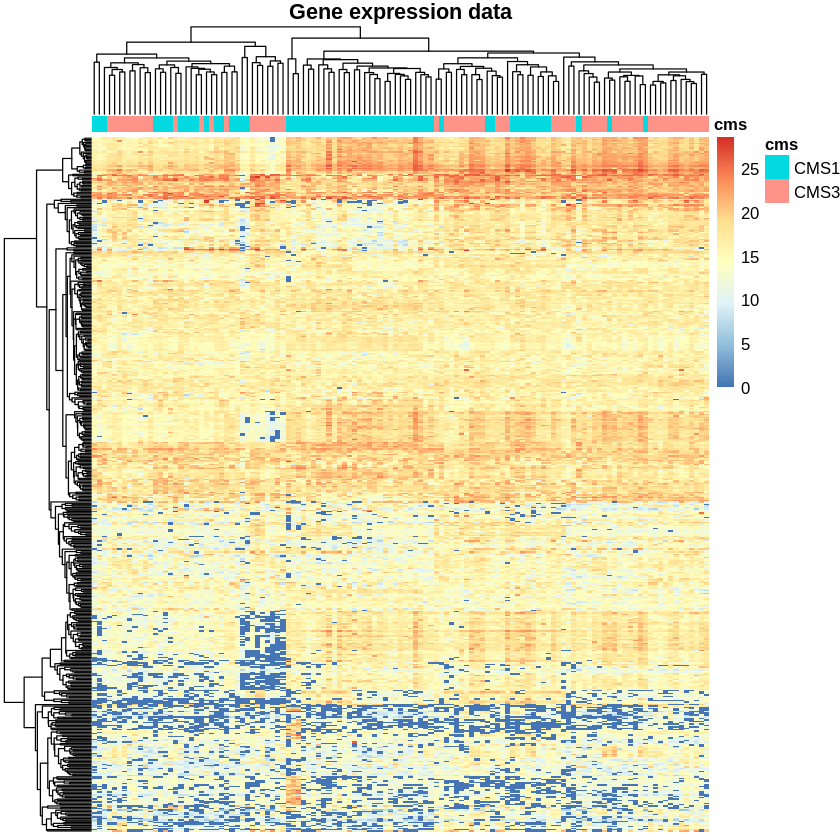

In [ ]:
# gene expression
pheatmap::pheatmap(x1,
                  annotation_col = anno_col,
                  show_colnames = FALSE,
                  show_rownames = FALSE,
                  main = 'Gene expression data')

each column is a tumor, and each row is a gene. The values in the cells are FPKM values. There is another band above the heatmap annotating each column (tumor) with its corresponding subtype. The tumors are clustered using hierarchical clustering denoted by the dendrogram above the heatmap, according to which the columns (tumors) are ordered. While this ordering corresponds somewhat to the subtypes, it would not be possible to cut this dendrogram in a way which achieves perfect separation between the subtypes.

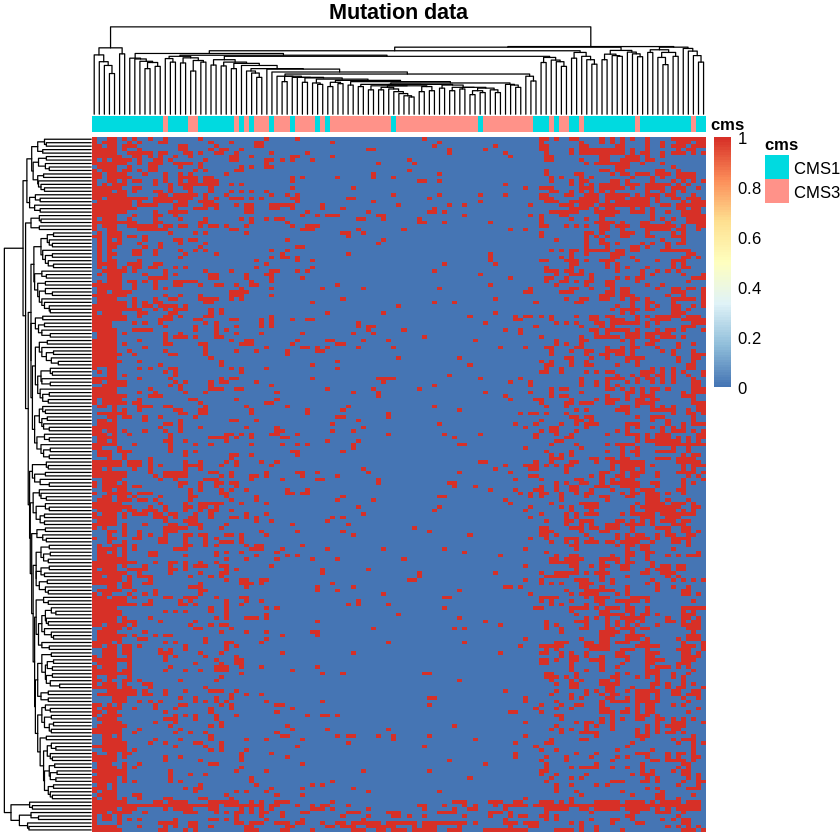

In [ ]:
# mutation
pheatmap::pheatmap(x2,
                   annotation_col = anno_col,
                   show_colnames = FALSE,
                   show_rownames = FALSE,
                   main="Mutation data")

An examination of figure above shows that tumors clustered and ordered by mutation data correspond very closely to their CMS subtypes. However, one should be careful in drawing conclusions about this result. Upon closer examination, you might notice that the separating factor seems to be that CMS1 tumors have significantly more mutations than do CMS3 tumors. This, rather than mutations in a specific genes, seems to be driving this clustering result. Nevertheless, this hyper-mutated status is an important indicator for this subtype.

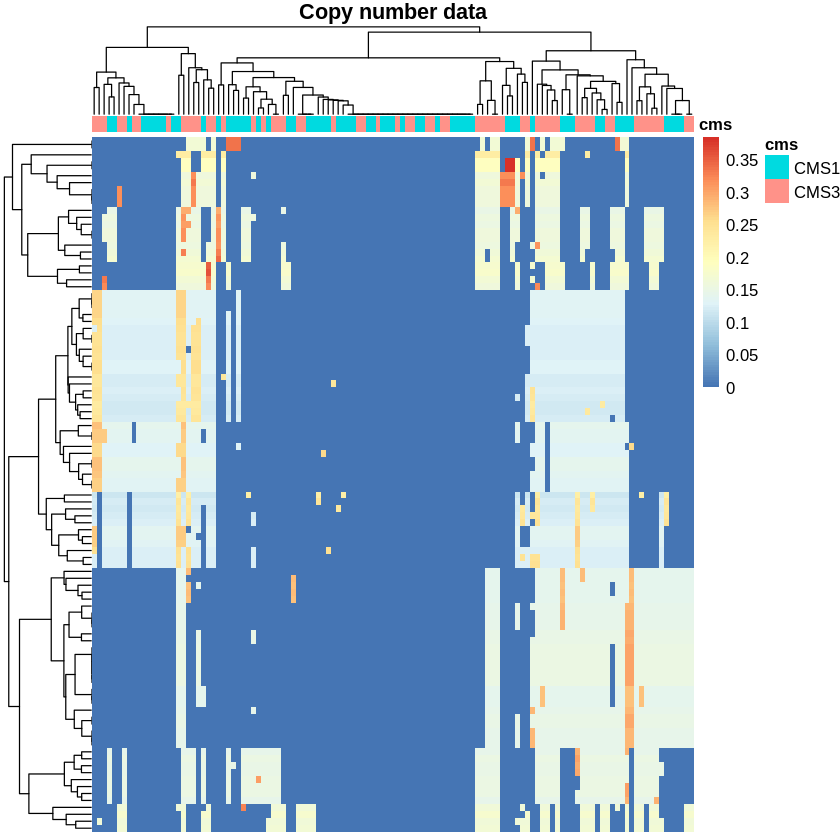

In [ ]:
# copy number variation
pheatmap::pheatmap(x3,
                   annotation_col = anno_col,
                   show_colnames = FALSE,
                   show_rownames = FALSE,
                   main="Copy number data")

It is clear that while there is some “signal” in each of these omics types, as is evident from these heatmaps, it is equally clear that none of these omics types completely and on its own explains the subtypes. Each omics type provides but a glimpse into what makes each of these tumors different from a healthy cell. 

Unsupervised multi-omics integration methods are methods that look for patterns within and across data types, in a label-agnostic fashion, i.e. without knowledge of the identity or label of the analyzed samples (e.g. cell type, tumor/normal). This chapter focuses on latent variable models, a form of dimensionality reduction technique. Latent variable models make an assumption that the high-dimensional data we observe (e.g. counts of tens of thousands of mRNA molecules) arise from a lower dimension description. The variables in that lower dimensional description are termed latent variables, as they are believed to be latent in the data, but not directly observable through experimentation. Therefore, there is a need for methods to infer the latent variables from the data. For instance, the relative abundance of different mRNA molecules in a cell is largely determined by the cell type. There are other experiments which may be used to discern the cell type of cells (e.g. looking at them under a microscope), but an RNA-seq experiment does not, directly, reveal whether the analyzed sample was taken from one organ or another. A latent variable model would set the cell type as a latent variable, and the observable abundance of mRNA molecules to be dependent on the value of the latent variable (e.g. if the latent variable is “Regulatory T-cell”, we would expect to find high expression of CD4, FOXP3, and CD25).

In [ ]:
# run the MFA function from the FactoMineR package
r.mfa <- FactoMineR::MFA(
  t(rbind(x1,x2,x3)), # binding the omics types together
  c(dim(x1)[1], dim(x2)[1], dim(x3)[1]), # specifying the dimensions of each
  graph=FALSE)

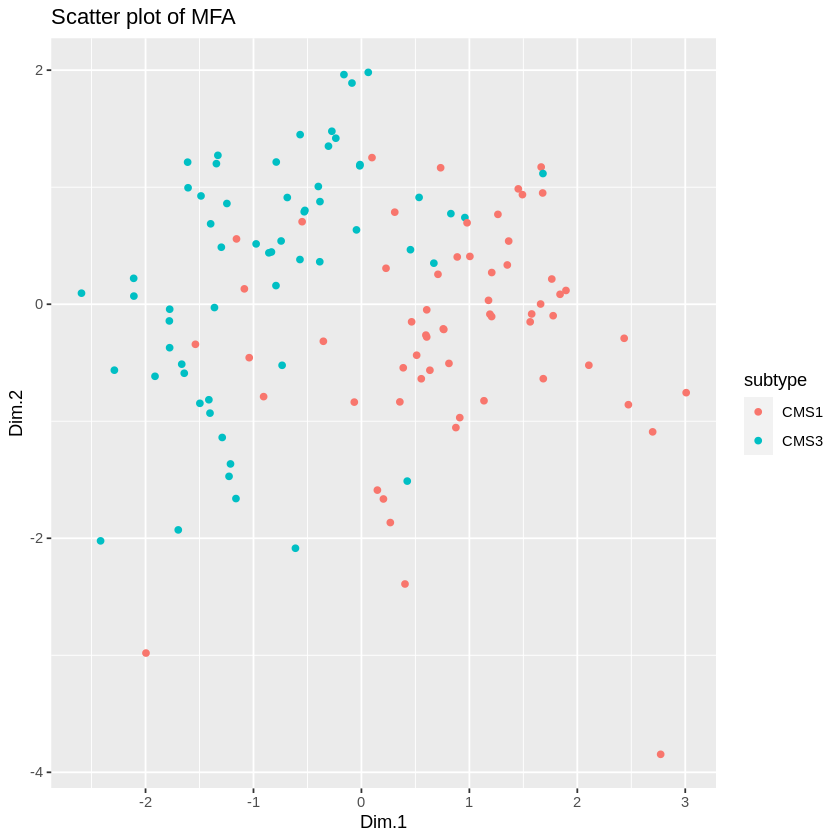

In [ ]:
# first, extract the H and W matrices from the MFA run result
mfa.h <- r.mfa$global.pca$ind$coord
mfa.w <- r.mfa$quanti.var$coord

# create a dataframe with the H matrix and the CMS label
mfa_df <- as.data.frame(mfa.h)
mfa_df$subtype <- factor(covariates[rownames(mfa_df),]$cms_label)

# create the plot
ggplot2::ggplot(mfa_df, ggplot2::aes(x=Dim.1, y=Dim.2, color=subtype)) +
ggplot2::geom_point() + ggplot2::ggtitle("Scatter plot of MFA")

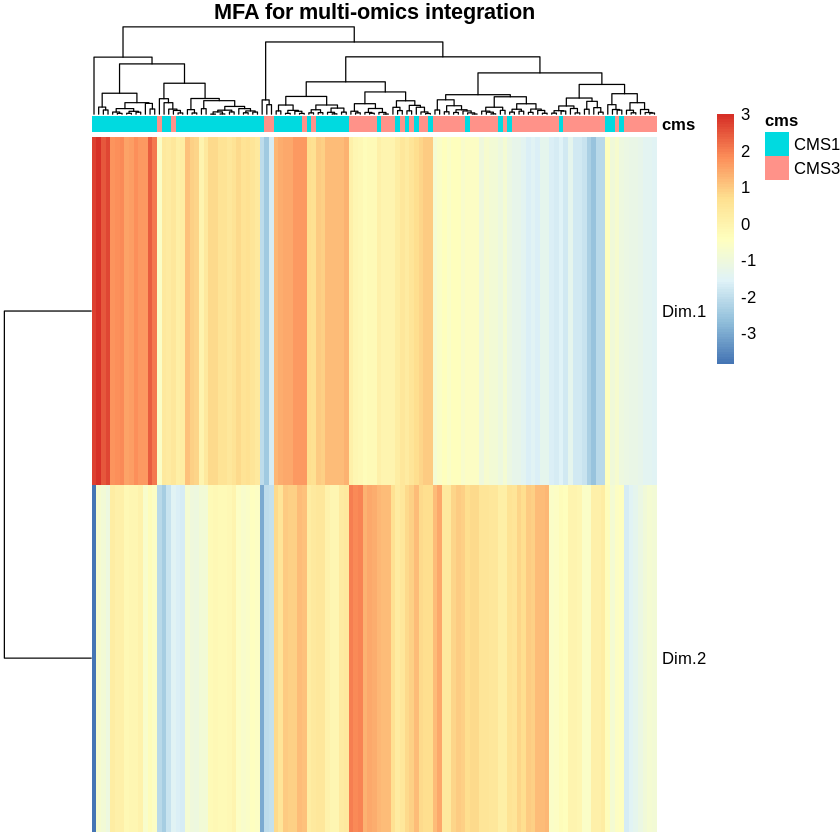

In [ ]:
pheatmap::pheatmap(t(mfa.h)[1:2,], annotation_col = anno_col,
                  show_colnames = FALSE,
                  main="MFA for multi-omics integration")

In [ ]:
# helper function to to turn CNV data into a non-negative form
split_neg_columns <- function(x) {
    new_cols <- list()
    for(i in seq_len(dim(x)[2])) {
        new_cols[[paste0(colnames(x)[i],'+')]] <- sapply(X = x[,i], 
                                                         function(x) max(0,x))
        new_cols[[paste0(colnames(x)[i],'-')]] <- sapply(X = -x[,i],
                                                         function(x) max(0,x))
    }
    new_cols
    return(do.call(cbind, new_cols))
}

# Feature-normalize the data
x1.featnorm <- x1 / rowSums(x1)
x2.featnorm <- x2 / rowSums(x2)
x3.featnorm <- x3 / rowSums(x3)

# Normalize by each omics type's frobenius norm
x1.featnorm.frobnorm <- x1.featnorm / norm(as.matrix(x1.featnorm), type="F")
x2.featnorm.frobnorm <- x2.featnorm / norm(as.matrix(x2.featnorm), type="F")
x3.featnorm.frobnorm <- x3.featnorm / norm(as.matrix(x3.featnorm), type="F")

# Split the features of the CNV matrix into two non-negative features each
x3.featnorm.frobnorm.nonneg <- t(split_neg_columns(t(x3.featnorm.frobnorm)))

# run the nmf function from the NMF package
require(NMF)

Loading required package: NMF

Loading required package: pkgmaker

Loading required package: registry

Loading required package: rngtools

Loading required package: cluster

NMF - BioConductor layer [OK] | Shared memory capabilities [NO: bigmemory] | Cores 2/2

  To enable shared memory capabilities, try: install.extras('
NMF
')



In [ ]:
r.nmf <- nmf(t(rbind(x1.featnorm.frobnorm,
                    x2.featnorm.frobnorm,
                    x3.featnorm.frobnorm.nonneg)),
              2,
              method = 'Frobenius')

# extract the H and W matrices from the nmf run result
nmf.h <- NMF::basis(r.nmf)
nmf.w <- NMF::coef(r.nmf)
nmfw <- t(nmf.w)

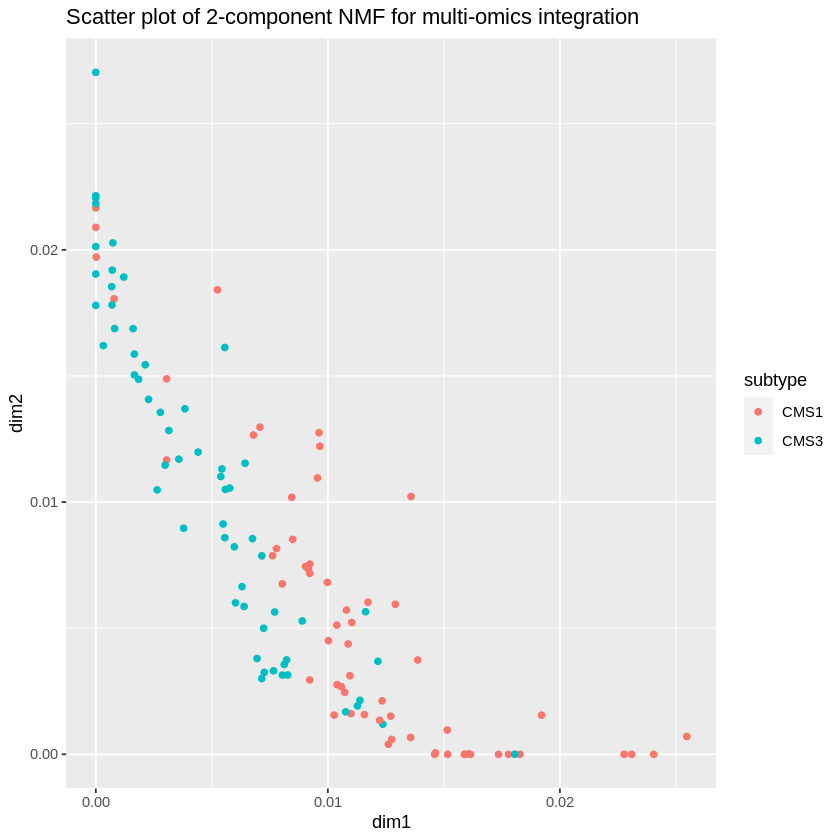

In [ ]:
# create a dataframe with the H matrix and the CMS label (subtype)
nmf_df <- as.data.frame(nmf.h)
colnames(nmf_df) <- c("dim1", "dim2")
nmf_df$subtype <- factor(covariates[rownames(nmf_df),]$cms_label)

# create the scatter plot
ggplot2::ggplot(nmf_df, ggplot2::aes(x=dim1, y=dim2, color=subtype)) +
ggplot2::geom_point() +
ggplot2::ggtitle("Scatter plot of 2-component NMF for multi-omics integration")

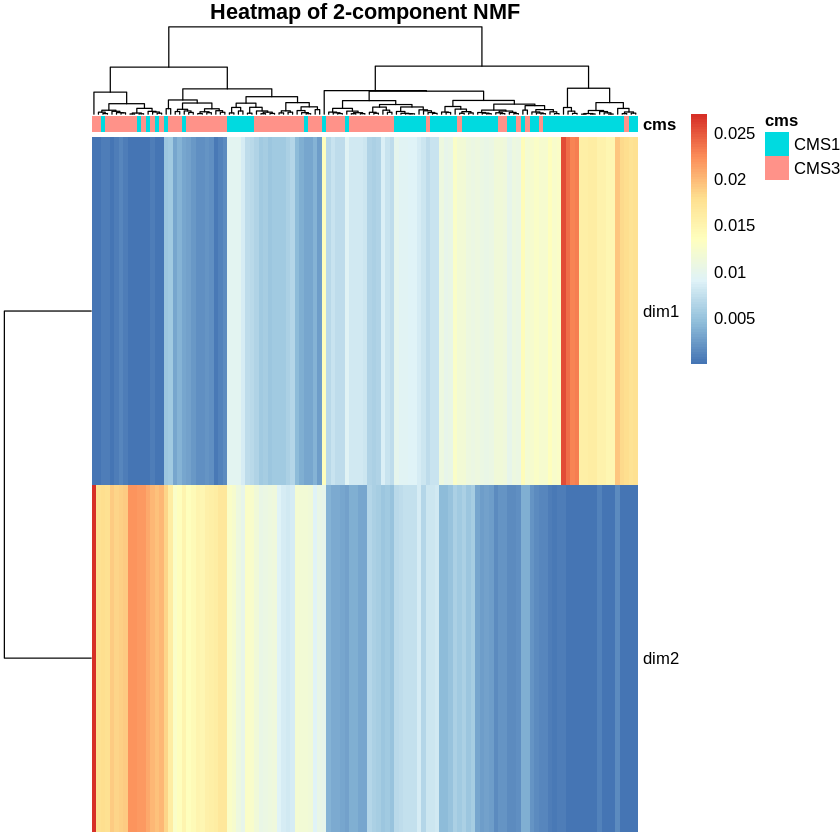

In [ ]:
# if > 2 factors, it's better to visualize using heatmap
pheatmap::pheatmap(t(nmf_df[,1:2]),
                   annotation_col = anno_col,
                   show_colnames=FALSE,
                   main="Heatmap of 2-component NMF")

In [ ]:
# use iCluster+
# run the iClusterPlus function
r.icluster <- iClusterPlus::iClusterPlus(
  t(x1), # Providing each omics type
  t(x2),
  t(x3),
  type=c("gaussian", "binomial", "multinomial"), # Providing the distributions
  K=2, # provide the number of factors to learn
  alpha=c(1,1,1), # as well as other model parameters
  lambda=c(.03,.03,.03))

# extract the H and W matrices from the run result
# here, we refer to H as z, to keep with iCluster terminology
icluster.z <- r.icluster$meanZ
rownames(icluster.z) <- rownames(covariates) # fix the row names
icluster.ws <- r.icluster$beta

# construct a dataframe with the H matrix (z) and the cancer subtypes
# for later plotting
icp_df <- as.data.frame(icluster.z)
colnames(icp_df) <- c("dim1", "dim2")
rownames(icp_df) <- colnames(x1)
icp_df$subtype <- factor(covariates[rownames(icp_df),]$cms_label)

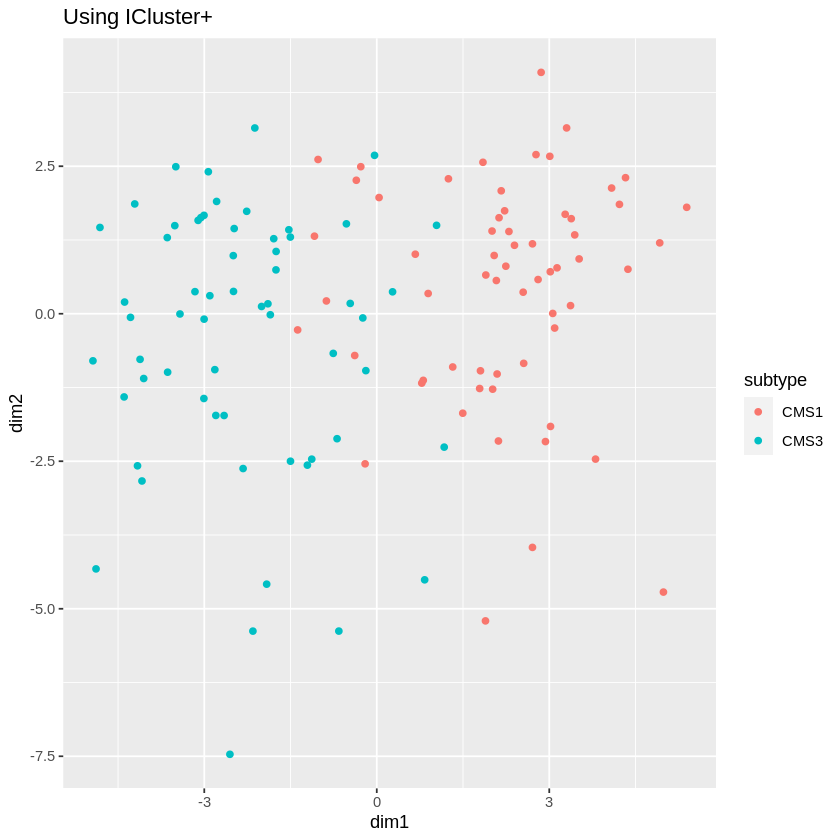

In [ ]:
ggplot2::ggplot(icp_df, ggplot2::aes(x=dim1, y=dim2, color=subtype)) +
ggplot2::geom_point() + 
ggplot2::ggtitle('Using ICluster+')

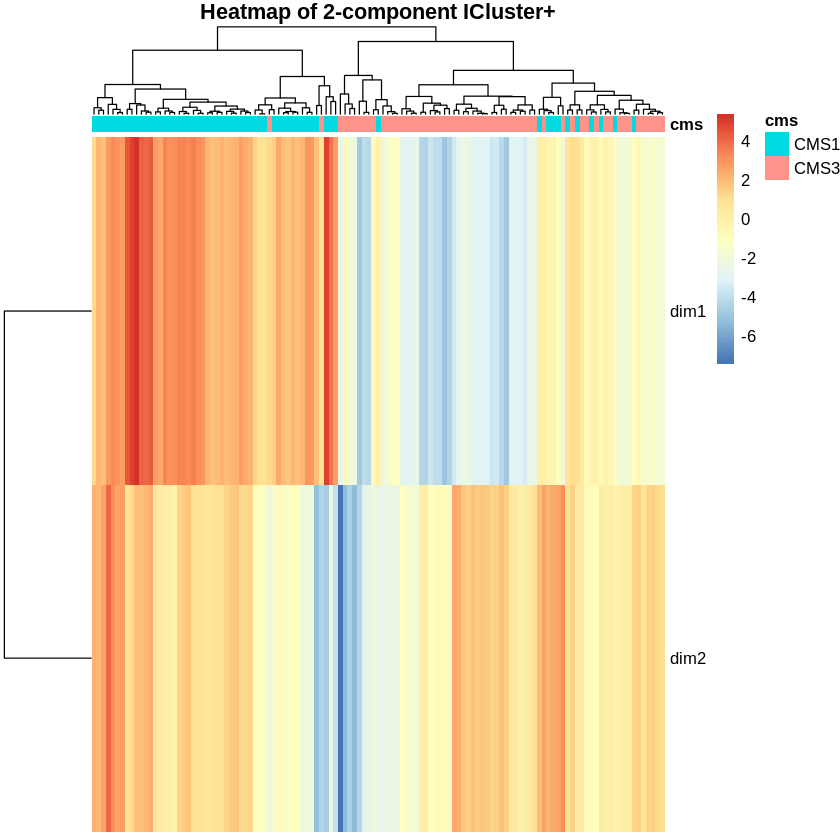

In [ ]:
pheatmap::pheatmap(t(icp_df[, 1:2]),
                  annotation_col = anno_col,
                  show_colnames=FALSE,
                  main='Heatmap of 2-component ICluster+')

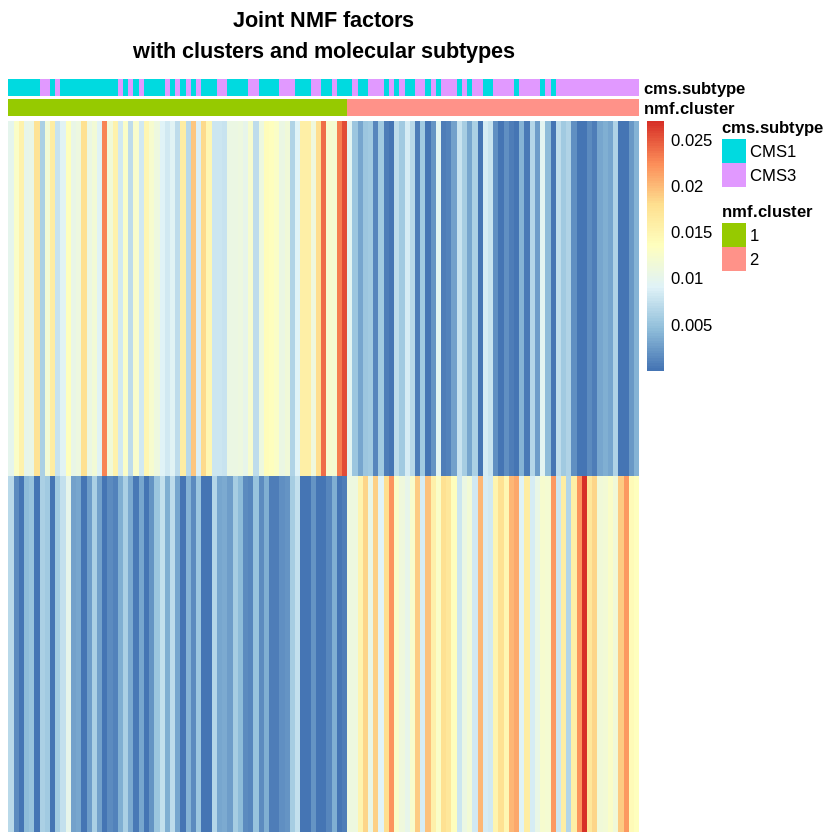

In [ ]:
# one-hot clustering in one line of code:
# assign each sample the cluster according to its dominant NMF factor
# easily accessible using the max.col function
nmf.clusters <- max.col(nmf.h)
names(nmf.clusters) <- rownames(nmf.h)

# create an annotation data frame indicating the NMF one-hot clusters
# as well as the cancer subtypes, for the heatmap plot below
anno_nmf_cl <- data.frame(
  nmf.cluster=factor(nmf.clusters),
  cms.subtype=factor(covariates[rownames(nmf.h),]$cms_label)
)

# generate the plot
pheatmap::pheatmap(t(nmf.h[order(nmf.clusters),]),
  cluster_cols=FALSE, cluster_rows=FALSE,
  annotation_col = anno_nmf_cl,
  show_colnames = FALSE,border_color=NA,
  main="Joint NMF factors\nwith clusters and molecular subtypes")

We see that using one-hot clustering with Joint NMF, we were able to find two clusters in the data which correspond fairly well with the molecular subtype of the tumors.

The one-hot clustering method does not lend itself very well to the other methods discussed above, i.e. iCluster and MFA. The latent variables produced by those other methods may be negative, and further, in the case of iCluster, are going to assume a multivariate Gaussian shape. As such, it is not trivial to pick one “dominant factor” for them. For NMF variants, this is a very common way to assign clusters.

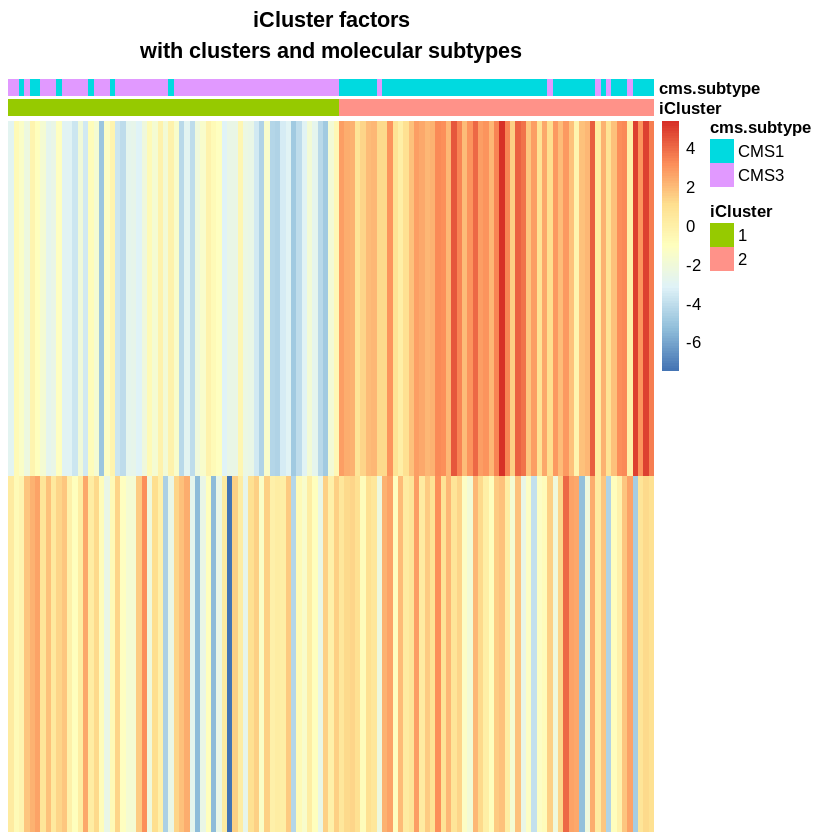

In [ ]:
# use the kmeans function to cluster the iCluster H matrix (here, z)
# using 2 as the number of clusters.
icluster.clusters <- kmeans(icluster.z, 2)$cluster
names(icluster.clusters) <- rownames(icluster.z)

# create an annotation dataframe for the heatmap plot
# containing the kmeans cluster assignments and the cancer subtypes
anno_icluster_cl <- data.frame(
  iCluster=factor(icluster.clusters),
  cms.subtype=factor(covariates$cms_label))

# generate the figure
pheatmap::pheatmap(
  t(icluster.z[order(icluster.clusters),]), # order z by the kmeans clusters
  cluster_cols=FALSE, # use cluster_cols and cluster_rows=FALSE
  cluster_rows=FALSE, # as we want the ordering by k-means clusters to hold
  show_colnames = FALSE,border_color=NA,
  annotation_col = anno_icluster_cl,
  main="iCluster factors\nwith clusters and molecular subtypes")

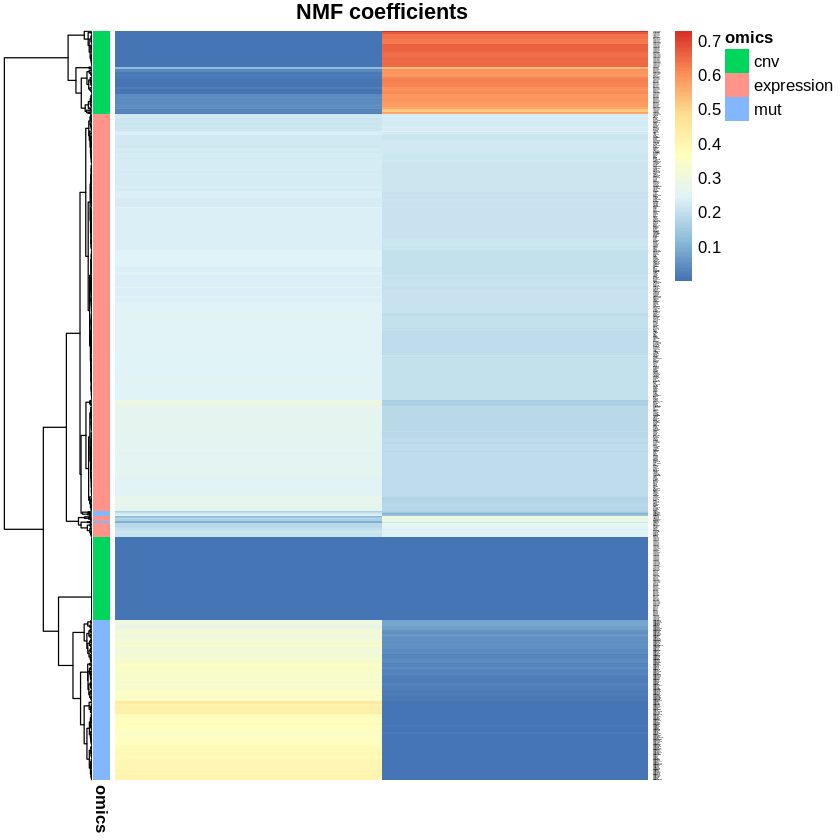

In [ ]:
# inspection of feature weights in loading vectors
# create an annotation dataframe for the heatmap
# for each feature, indicating its omics-type
data_anno <- data.frame(
  omics=c(rep('expression',dim(x1)[1]),
          rep('mut',dim(x2)[1]),
          rep('cnv',dim(x3.featnorm.frobnorm.nonneg)[1])))
rownames(data_anno) <- c(rownames(x1),
                         paste0("mut:", rownames(x2)),
                         rownames(x3.featnorm.frobnorm.nonneg))
rownames(nmfw) <- rownames(data_anno)

# generate the heat map
pheatmap::pheatmap(nmfw,
                   cluster_cols = FALSE,
                   annotation_row = data_anno,
                   main="NMF coefficients",
                   clustering_distance_rows = "manhattan",
                   fontsize_row = 1)

In [ ]:
require(enrichR)

# select genes associated preferentially with each factor
# by their relative loading in the W matrix
genes.factor.1 <- names(which(nmfw[1:dim(x1)[1],1] > nmfw[1:dim(x1)[1],2]))
genes.factor.2 <- names(which(nmfw[1:dim(x1)[1],1] < nmfw[1:dim(x1)[1],2]))

# call the enrichr function to find gene sets enriched
# in each latent factor in the GO Biological Processes 2018 library
go.factor.1 <- enrichR::enrichr(genes.factor.1,
                                databases = c("GO_Biological_Process_2018")
                                )$GO_Biological_Process_2018
go.factor.2 <- enrichR::enrichr(genes.factor.2,
                                databases = c("GO_Biological_Process_2018")
                                )$GO_Biological_Process_2018

Loading required package: enrichR

Welcome to enrichR
Checking connection ... 

Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is available!

WormEnrichr ... 
Connection is available!

YeastEnrichr ... 
Connection is available!

FishEnrichr ... 
Connection is available!



Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.


In [ ]:
head(go.factor.1)

,Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes
,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>
1,nuclear-transcribed mRNA catabolic process (GO:0000956),26/174,2.262054e-14,5.374640e-11,0,0,8.000254,251.3673,RPL4;RPL30;DDX5;RPLP1;RPL8;RPL10A;SMG7;RPL6;ZFP36;EXOSC5;EXOSC4;EXOSC8;RPS11;RPS27A;RPS10;RPL19;UPF1;NCBP2;RPL13A;RPS26;CNOT11;EIF3E;PABPC1;RPL29;RPS24;RPS23
2,rRNA metabolic process (GO:0016072),26/200,6.431851e-13,6.066698e-10,0,0,6.795694,190.7711,TRIR;RPL4;RPL30;DDX49;RPLP1;RPL8;RPL10A;RPL6;FBL;EXOSC5;EXOSC4;NOB1;EXOSC8;RPS11;RPS27A;RPS10;LYAR;RPL19;IMP3;GTF3A;RPL13A;RPS26;RPL29;RPP25;RPS24;RPS23
3,"nuclear-transcribed mRNA catabolic process, nonsense-mediated decay (GO:0000184)",20/112,7.659972e-13,6.066698e-10,0,0,9.790660,273.1359,RPL4;UPF1;RPL30;NCBP2;RPLP1;RPL13A;RPL8;RPL10A;SMG7;RPL6;RPS26;EIF3E;PABPC1;RPS11;RPL29;RPS27A;RPS10;RPS24;RPS23;RPL19
4,ribosome biogenesis (GO:0042254),27/226,1.780941e-12,1.057879e-09,0,0,6.177038,167.1128,RPL4;RPL30;DDX49;RPLP1;RPL8;RPL10A;RPL6;FBL;EXOSC5;EXOSC4;NOB1;EXOSC8;SURF6;RPS11;RPS27A;RPS10;LYAR;RPL19;IMP3;GTF3A;RPL13A;RPS26;RPL29;RPP25;RPS24;RAN;RPS23
5,ncRNA processing (GO:0034470),26/227,1.217788e-11,5.786927e-09,0,0,5.874641,147.6380,RPL4;RPL30;DDX49;RPLP1;RPL8;RPL10A;RPL6;FBL;EXOSC5;EXOSC4;NOB1;EXOSC8;RPS11;RPS27A;RPS10;LYAR;RPL19;SSB;IMP3;RPL13A;RPS26;HNRNPA2B1;RPL29;RPP25;RPS24;RPS23
6,rRNA processing (GO:0006364),24/202,3.501561e-11,1.386618e-08,0,0,6.102069,146.9087,RPL4;RPL30;DDX49;IMP3;RPLP1;RPL13A;RPL8;RPL10A;RPL6;RPS26;FBL;EXOSC5;EXOSC4;NOB1;EXOSC8;RPS11;RPL29;RPS27A;RPP25;RPS10;LYAR;RPS24;RPS23;RPL19


In [ ]:
head(covariates)

,dataset,age,gender,stage,pt,pn,pm,tnm,grade,msi,cimp,kras_mut,braf_mut,cms_label,osMo,osStat,rfsMo,rfsStat
,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<lgl>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<int>,<lgl>,<lgl>
TCGA.A6.2672,tcga,82,female,3,3,1,0,IIIB,NA,msi,CIMP.High,0,0,CMS1,16.536986,0,NA,NA
TCGA.A6.3809,tcga,71,female,2,4,0,0,IIB/IIC,NA,msi,CIMP.High,NA,NA,CMS1,10.290411,0,NA,NA
TCGA.A6.5661,tcga,80,female,2,3,0,0,IIA,NA,msi,CIMP.High,0,1,CMS1,10.060274,0,NA,NA
TCGA.A6.5665,tcga,84,female,2,3,0,0,IIA,NA,msi,CIMP.High,0,1,CMS1,9.402740,0,NA,NA
TCGA.A6.6653,tcga,82,male,1,2,0,0,I,NA,msi,CIMP.High,1,1,CMS1,2.958904,0,NA,NA
TCGA.A6.6780,tcga,74,male,2,3,0,NA,IIA,NA,msi,CIMP.Low,0,0,CMS1,2.827397,0,NA,NA


Warning message in data.frame(age = covariates$age, gender = as.numeric(covariates$gender), :
“NAs introduced by coercion”


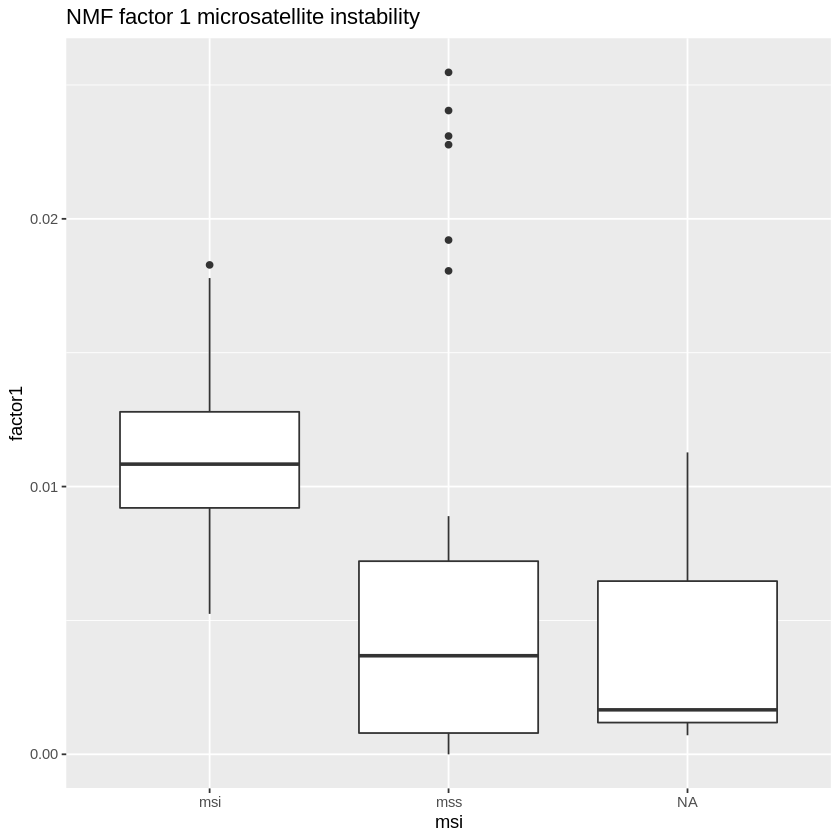

In [ ]:
# create a data frame holding covariates (age, gender, MSI status)
a <- data.frame(age=covariates$age,
                gender=as.numeric(covariates$gender),
                msi=covariates$msi)
                
b <- nmf.h
colnames(b) <- c('factor1', 'factor2')
cov_factor <- cbind(a, b)

# generate the figure
ggplot2::ggplot(cov_factor, ggplot2::aes(x=msi, y=factor1, group=msi)) +
  ggplot2::geom_boxplot() +
  ggplot2::ggtitle("NMF factor 1 microsatellite instability")

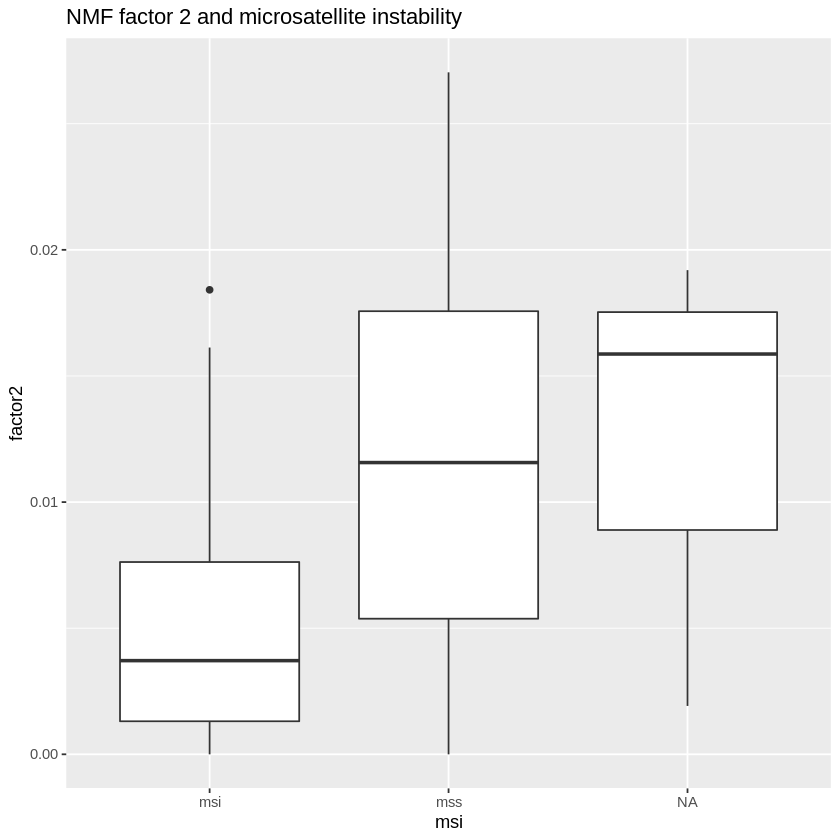

In [ ]:
ggplot2::ggplot(cov_factor, ggplot2::aes(x=msi, y=factor2, group=msi)) +
  ggplot2::geom_boxplot() +
  ggplot2::ggtitle("NMF factor 2 and microsatellite instability")

Figures above show that NMF factor 1 and NMF factor 2 are separated by the MSI or MSS (microsatelity stability) status of the tumors

In [ ]:
dim(x1)

[1] 500 121

In [ ]:
dim(x2)

[1] 200 121

In [ ]:
dim(x3)

[1] 100 121

In [ ]:
dim(t(covariates))

[1]  18 121

# Run using MOFA

In [2]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("MOFA2")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.1 (2021-08-10)

Installing package(s) 'BiocVersion', 'MOFA2'

also installing the dependencies ‘matrixStats’, ‘RcppEigen’, ‘BH’, ‘sitmo’, ‘filelock’, ‘Rhdf5lib’, ‘rhdf5filters’, ‘plyr’, ‘png’, ‘BiocGenerics’, ‘S4Vectors’, ‘IRanges’, ‘MatrixGenerics’, ‘FNN’, ‘RSpectra’, ‘RcppAnnoy’, ‘irlba’, ‘RcppProgress’, ‘dqrng’, ‘dir.expiry’, ‘basilisk.utils’, ‘rhdf5’, ‘reshape2’, ‘pheatmap’, ‘cowplot’, ‘ggrepel’, ‘reticulate’, ‘HDF5Array’, ‘corrplot’, ‘DelayedArray’, ‘Rtsne’, ‘uwot’, ‘basilisk’


Old packages: 'htmltools', 'openssl', 'stringi', 'tibble'



In [3]:
library(MOFA2)
library(tidyverse)
library(data.table)


Attaching package: ‘MOFA2’


The following object is masked from ‘package:stats’:

    predict


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [ ]:
system('pip3 install mofapy2')

In [ ]:
library(reticulate)
py_config()
#use_python("/usr/bin/python3", required = TRUE)


python:         /usr/bin/python3
libpython:      /usr/lib/python3.7/config-3.7m-x86_64-linux-gnu/libpython3.7.so
pythonhome:     //usr://usr
version:        3.7.11 (default, Jul  3 2021, 18:01:19)  [GCC 7.5.0]
numpy:          /usr/local/lib/python3.7/dist-packages/numpy
numpy_version:  1.19.5

python versions found: 
 /usr/bin/python3
 /usr/bin/python
 /usr/local/bin/python

In [ ]:
data <- list(as.matrix(x1), as.matrix(x2), as.matrix(x3))
head(data)

In [ ]:
names(data) <- c('mRNA', 'Mutation', 'CNV')

In [ ]:
lapply(data, dim)

$mRNA
[1] 500 121

$Mutation
[1] 200 121

$CNV
[1] 100 121

In [ ]:
MOFAobject <- create_mofa(data)

Creating MOFA object from a list of matrices (features as rows, sample as columns)...


Warning message in .rename_duplicated_features(object):
“There are duplicated features names across different views. We will add the suffix *_view* only for those features 
            Example: if you have both TP53 in mRNA and mutation data it will be renamed to TP53_mRNA, TP53_mutation”


In [ ]:
MOFAobject

Untrained MOFA model with the following characteristics: 
 Number of views: 3 
 Views names: mRNA Mutation CNV 
 Number of features (per view): 500 200 100 
 Number of groups: 1 
 Groups names: group1 
 Number of samples (per group): 121 
 

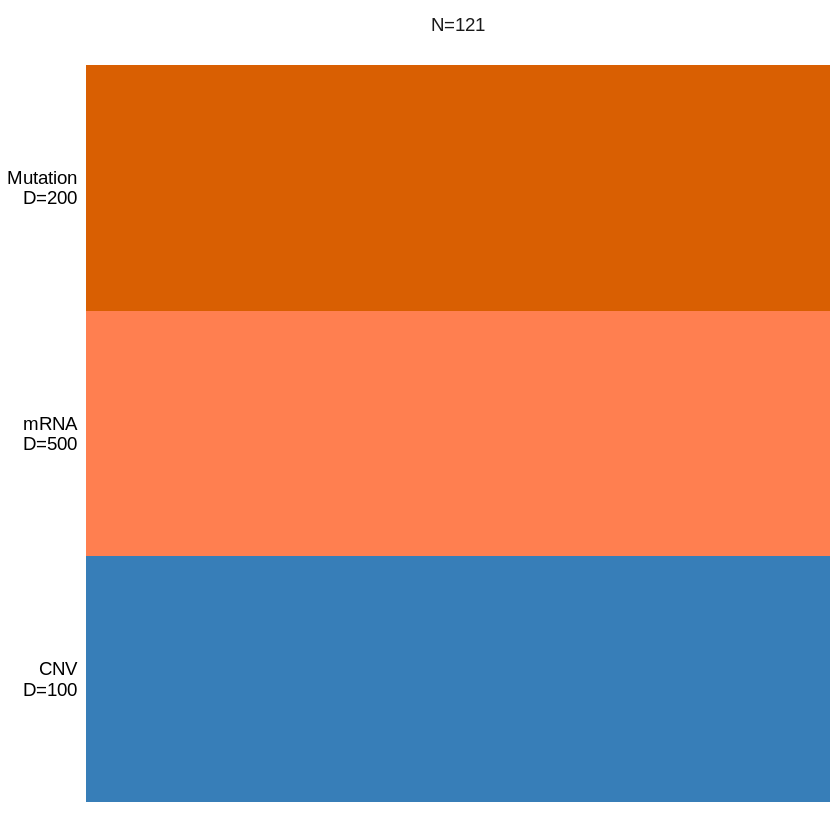

In [ ]:
plot_data_overview(MOFAobject)

In [ ]:
# check metadata
CLL_metadata <- fread("ftp://ftp.ebi.ac.uk/pub/databases/mofa/cll_vignette/sample_metadata.txt")
head(CLL_metadata)

sample,Gender,age,TTT,TTD,treatedAfter,died,IGHV,trisomy12
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<int>,<int>
H005,m,75.26575,0.57494867,2.625599,TRUE,FALSE,1,0
H006,m,NA,NA,NA,NA,NA,NA,NA
H007,f,NA,NA,NA,NA,NA,NA,NA
H008,m,NA,NA,NA,NA,NA,NA,NA
H010,f,72.78082,2.93223819,2.932238,FALSE,FALSE,0,0
H011,f,72.99452,0.01916496,2.951403,TRUE,FALSE,1,0


In [ ]:
covariates$sample <- rownames(covariates)
head(covariates)

,dataset,age,gender,stage,pt,pn,pm,tnm,grade,msi,cimp,kras_mut,braf_mut,cms_label,osMo,osStat,rfsMo,rfsStat,sample
,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<lgl>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<int>,<lgl>,<lgl>,<chr>
TCGA.A6.2672,tcga,82,female,3,3,1,0,IIIB,NA,msi,CIMP.High,0,0,CMS1,16.536986,0,NA,NA,TCGA.A6.2672
TCGA.A6.3809,tcga,71,female,2,4,0,0,IIB/IIC,NA,msi,CIMP.High,NA,NA,CMS1,10.290411,0,NA,NA,TCGA.A6.3809
TCGA.A6.5661,tcga,80,female,2,3,0,0,IIA,NA,msi,CIMP.High,0,1,CMS1,10.060274,0,NA,NA,TCGA.A6.5661
TCGA.A6.5665,tcga,84,female,2,3,0,0,IIA,NA,msi,CIMP.High,0,1,CMS1,9.402740,0,NA,NA,TCGA.A6.5665
TCGA.A6.6653,tcga,82,male,1,2,0,0,I,NA,msi,CIMP.High,1,1,CMS1,2.958904,0,NA,NA,TCGA.A6.6653
TCGA.A6.6780,tcga,74,male,2,3,0,NA,IIA,NA,msi,CIMP.Low,0,0,CMS1,2.827397,0,NA,NA,TCGA.A6.6780


In [ ]:
data_opts <- get_default_data_options(MOFAobject)
data_opts

$scale_views
[1] FALSE

$scale_groups
[1] FALSE

$center_groups
[1] TRUE

$use_float32
[1] FALSE

$views
[1] "mRNA"     "Mutation" "CNV"     

$groups
[1] "group1"

In [ ]:
model_opts <- get_default_model_options(MOFAobject)
model_opts$num_factors <- 8

model_opts

$likelihoods
      mRNA   Mutation        CNV 
"gaussian" "gaussian" "gaussian" 

$num_factors
[1] 8

$spikeslab_factors
[1] FALSE

$spikeslab_weights
[1] TRUE

$ard_factors
[1] FALSE

$ard_weights
[1] TRUE

In [ ]:
train_opts <- get_default_training_options(MOFAobject)
train_opts$convergence_mode <- 'fast'
train_opts$seed <- 42
train_opts

$maxiter
[1] 1000

$convergence_mode
[1] "fast"

$drop_factor_threshold
[1] -1

$verbose
[1] FALSE

$startELBO
[1] 1

$freqELBO
[1] 5

$stochastic
[1] FALSE

$gpu_mode
[1] FALSE

$seed
[1] 42

$outfile
NULL

$weight_views
[1] FALSE

$save_interrupted
[1] FALSE

In [ ]:
MOFAobject <- prepare_mofa(MOFAobject,
  data_options = data_opts,
  model_options = model_opts,
  training_options = train_opts
)

Checking data options...

Checking training options...

Checking model options...



## Run MOFA

In [ ]:
MOFAobject <- run_mofa(MOFAobject, outfile = 'MOFA_cancer.hdf5', use_basilisk = TRUE)

Connecting to the mofapy2 package using basilisk. 
    Set 'use_basilisk' to FALSE if you prefer to manually set the python binary using 'reticulate'.



ERROR: ignored

In [ ]:
slotNames(MOFAobject)

[1] "data"               "covariates"         "covariates_warped" 
 [4] "intercepts"         "imputed_data"       "interpolated_Z"    
 [7] "samples_metadata"   "features_metadata"  "expectations"      
[10] "training_stats"     "data_options"       "model_options"     
[13] "training_options"   "stochastic_options" "mefisto_options"   
[16] "dimensions"         "on_disk"            "dim_red"           
[19] "cache"              "status"

In [ ]:
names(MOFAobject@data)

[1] "mRNA"     "Mutation" "CNV"

In [ ]:
dim(MOFAobject@data$mRNA$group1)

[1] 500 121

In [ ]:
names(MOFAobject@expectations)

NULL

In [ ]:
samples_metadata(MOFAobject) <- covariates

In [ ]:
plot_factor_cor(MOFAobject)

ERROR: ignored

In [ ]:
library(rhdf5)
MOFAobject <- H5Fopen('cancer.hdf5')
MOFAobject

HDF5 FILE 
        name /
    filename 

                 name       otype dclass dim
0  data               H5I_GROUP             
1  expectations       H5I_GROUP             
2  features           H5I_GROUP             
3  groups             H5I_GROUP             
4  intercepts         H5I_GROUP             
5  model_options      H5I_GROUP             
6  samples            H5I_GROUP             
7  training_opts      H5I_DATASET  FLOAT   6
8  training_stats     H5I_GROUP             
9  variance_explained H5I_GROUP             
10 views              H5I_GROUP             

In [ ]:
head(MOFAobject$data$CNV$group1)

-0.7306596,-0.7306596,-0.7306596,-0.7306596,-0.7306596,-0.7306596,-0.7306596,0.7428373,-0.7306596,0.7428373,⋯,0.7428373,-0.7306596,2.216334,0.7428373,-0.7306596,-0.7306596,-0.7306596,-0.7306596,-0.7306596,-0.7306596
-0.7132605,-0.7132605,-0.7132605,-0.7132605,-0.7132605,-0.7132605,-0.7132605,0.8849713,-0.7132605,0.8849713,⋯,0.8849713,-0.7132605,2.483203,0.8849713,-0.7132605,-0.7132605,-0.7132605,-0.7132605,-0.7132605,-0.7132605
-0.7109554,-0.7109554,-0.7109554,-0.7109554,-0.7109554,-0.7109554,-0.7109554,0.8531465,-0.7109554,0.8531465,⋯,0.8531465,-0.7109554,2.417248,0.8531465,-0.7109554,-0.7109554,-0.7109554,-0.7109554,-0.7109554,-0.7109554
-0.7211855,-0.7211855,-0.7211855,-0.7211855,-0.7211855,-0.7211855,-0.7211855,0.8654226,-0.7211855,0.8654226,⋯,0.8654226,-0.7211855,2.452031,0.8654226,-0.7211855,-0.7211855,-0.7211855,-0.7211855,-0.7211855,-0.7211855
-0.7273014,-0.7273014,-0.7273014,-0.7273014,-0.7273014,-0.7273014,-0.7273014,0.9331415,-0.7273014,0.9331415,⋯,0.9331415,-0.7273014,2.593584,0.9331415,-0.7273014,-0.7273014,-0.7273014,-0.7273014,-0.7273014,-0.7273014
-0.7160248,-0.7160248,-0.7160248,-0.7160248,-0.7160248,-0.7160248,-0.7160248,0.9186733,-0.7160248,0.9186733,⋯,0.9186733,-0.7160248,2.553371,0.9186733,-0.7160248,-0.7160248,-0.7160248,-0.7160248,-0.7160248,-0.7160248


In [ ]:
variance_decomp_by_factor = MOFAobject$variance_explained$r2_per_factor$group1
var

32.89422409,0.3084032,0.5268595
5.39197787,15.2131716,6.0938310
0.73771651,0.2819638,16.7750401
11.88290039,0.2867522,1.8334715
9.43655060,0.1535986,3.7897436
0.02476079,4.4745389,0.7542388


In [ ]:
h5ls('cancer.hdf5')

,group,name,otype,dclass,dim
,<chr>,<chr>,<chr>,<chr>,<chr>
0,/,data,H5I_GROUP,,
1,/data,CNV,H5I_GROUP,,
2,/data/CNV,group1,H5I_DATASET,FLOAT,100 x 121
3,/data,Mutation,H5I_GROUP,,
4,/data/Mutation,group1,H5I_DATASET,FLOAT,200 x 121
5,/data,RNA,H5I_GROUP,,
6,/data/RNA,group1,H5I_DATASET,FLOAT,500 x 121
7,/,expectations,H5I_GROUP,,
8,/expectations,W,H5I_GROUP,,


In [ ]:
h5read('cancer.hdf5', 'views')

Warning message in h5checktypeOrOpenLoc(file, readonly = TRUE, fapl = NULL, native = native):
“An open HDF5 file handle exists. If the file has changed on disk meanwhile, the function may not work properly. Run 'h5closeAll()' to close all open HDF5 object handles.”


$views
[1] "CNV"      "Mutation" "RNA"

In [ ]:
h5read('cancer.hdf5', 'variance_explained/r2_per_factor')

Warning message in h5checktypeOrOpenLoc(file, readonly = TRUE, fapl = NULL, native = native):
“An open HDF5 file handle exists. If the file has changed on disk meanwhile, the function may not work properly. Run 'h5closeAll()' to close all open HDF5 object handles.”


32.89422409,0.3084032,0.5268595
5.39197787,15.2131716,6.0938310
0.73771651,0.2819638,16.7750401
11.88290039,0.2867522,1.8334715
9.43655060,0.1535986,3.7897436
0.02476079,4.4745389,0.7542388


In [ ]:
h5read('cancer.hdf5', 'variance_explained/r2_total')

Warning message in h5checktypeOrOpenLoc(file, readonly = TRUE, fapl = NULL, native = native):
“An open HDF5 file handle exists. If the file has changed on disk meanwhile, the function may not work properly. Run 'h5closeAll()' to close all open HDF5 object handles.”


$group1
[1] 60.60760 19.85478 30.03008

In [ ]:
h5read('cancer.hdf5', 'model_options')

Warning message in h5checktypeOrOpenLoc(file, readonly = TRUE, fapl = NULL, native = native):
“An open HDF5 file handle exists. If the file has changed on disk meanwhile, the function may not work properly. Run 'h5closeAll()' to close all open HDF5 object handles.”


$ard_factors
[1] "True"

$ard_weights
[1] "True"

$likelihoods
[1] "gaussian" "gaussian" "gaussian"

$spikeslab_factors
[1] "False"

$spikeslab_weights
[1] "True"

In [4]:
MOFAobject <- load_model('cancer.hdf5', load_interpol_Z = T)

[1] "Predicitions of Z not found, not loading it..."
[1] "Variance of predictions of Z not found, not loading it..."
[1] "New values of Z not found, not loading it..."


Warning message in load_model("cancer.hdf5", load_interpol_Z = T):
“There are duplicated features names across different views. We will add the suffix *_view* only for those features 
            Example: if you have both TP53 in mRNA and mutation data it will be renamed to TP53_mRNA, TP53_mutation”
Warning message in .quality_control(object, verbose = verbose):
“Factor(s) 1, 2, 3 are strongly correlated with the total number of expressed features for at least one of your omics. Such factors appear when there are differences in the total 'levels' between your samples, *sometimes* because of poor normalisation in the preprocessing steps.
”


In [5]:
MOFAobject

Trained MOFA with the following characteristics: 
 Number of views: 3 
 Views names: CNV Mutation RNA 
 Number of features (per view): 100 200 500 
 Number of groups: 1 
 Groups names: group1 
 Number of samples (per group): 121 
 Number of factors: 6 


[[1]]

[[2]]


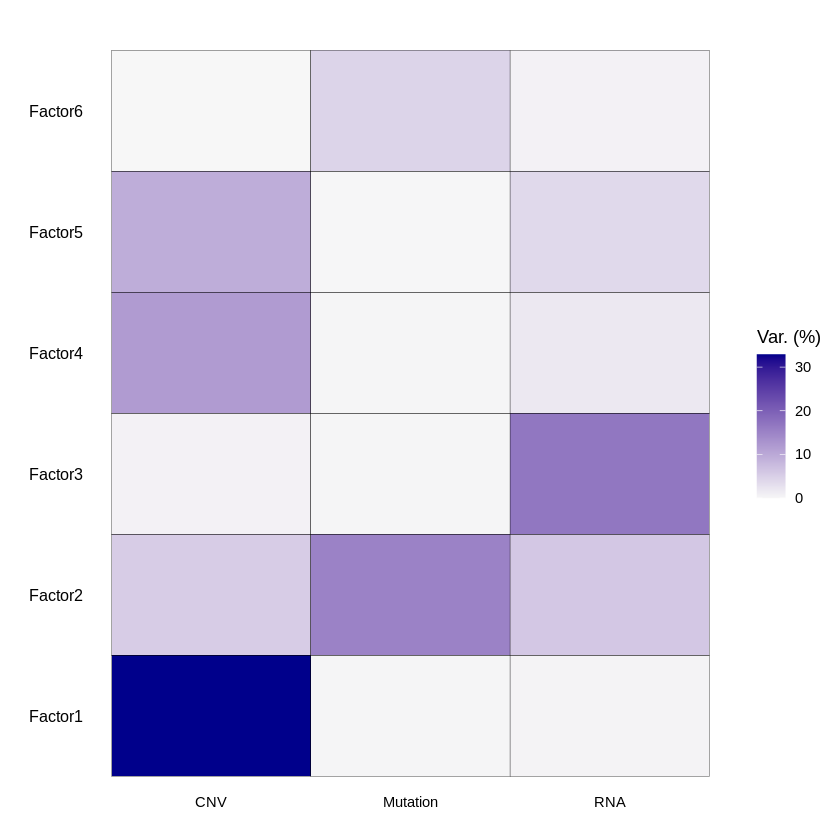

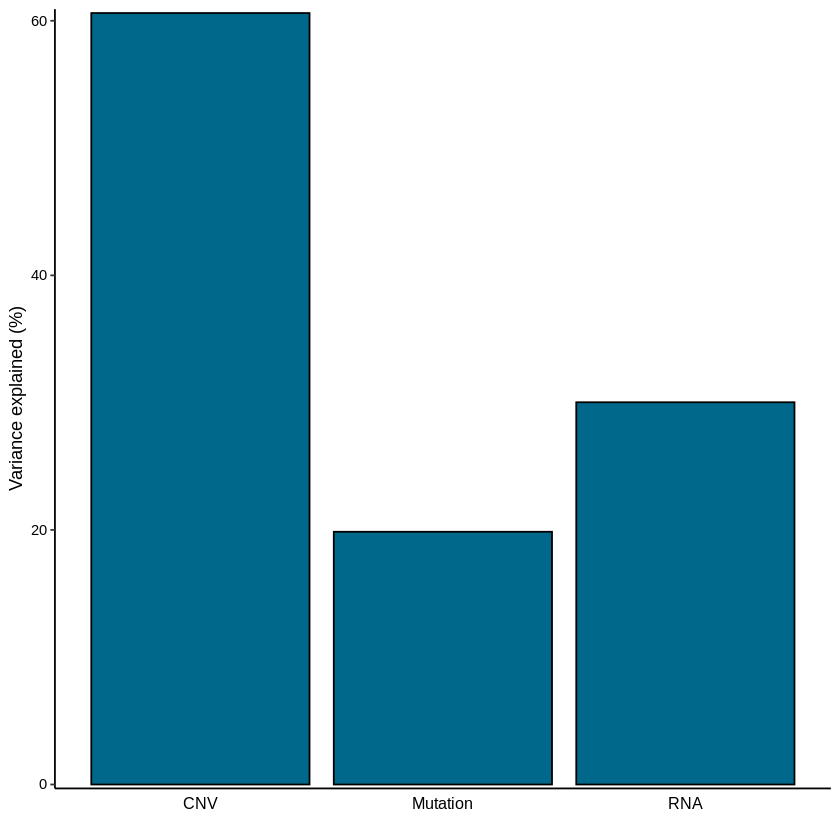

In [6]:
plot_variance_explained(MOFAobject, plot_total = T)

In [7]:
slotNames(MOFAobject)

[1] "data"               "covariates"         "covariates_warped" 
 [4] "intercepts"         "imputed_data"       "interpolated_Z"    
 [7] "samples_metadata"   "features_metadata"  "expectations"      
[10] "training_stats"     "data_options"       "model_options"     
[13] "training_options"   "stochastic_options" "mefisto_options"   
[16] "dimensions"         "on_disk"            "dim_red"           
[19] "cache"              "status"

In [18]:
covariates$sample <- rownames(covariates)
samples_metadata(MOFAobject) <- covariates

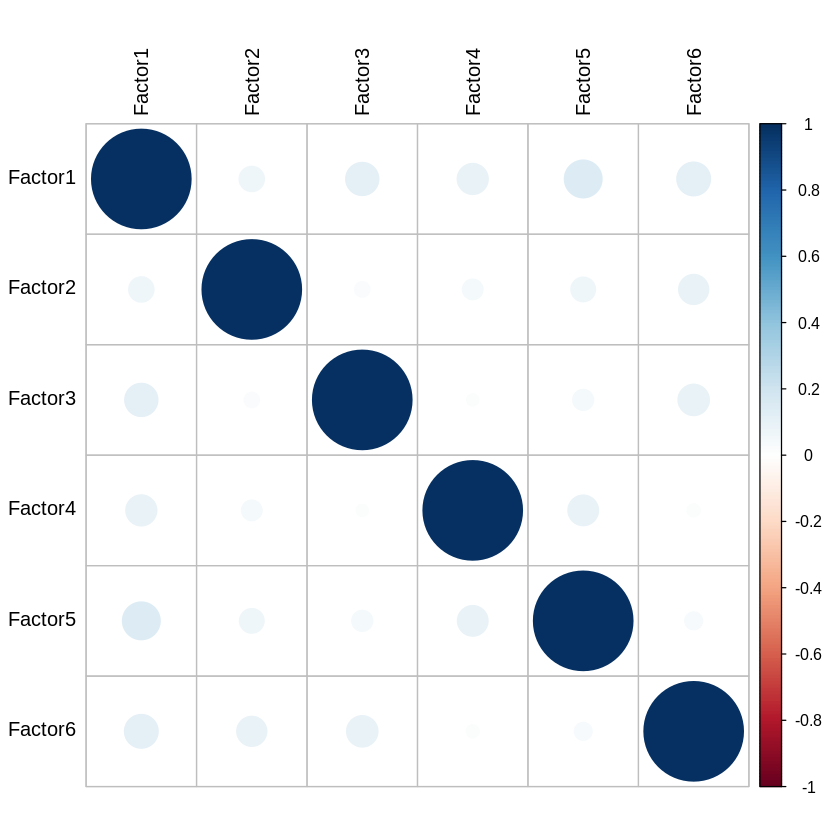

In [19]:
plot_factor_cor(MOFAobject)

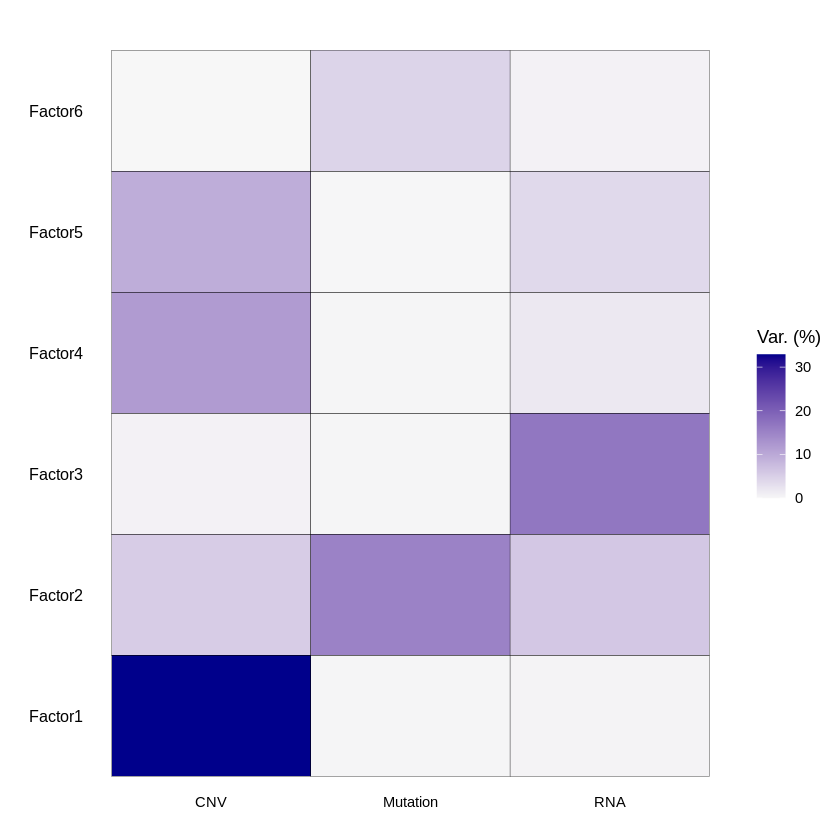

In [20]:
plot_variance_explained(MOFAobject)

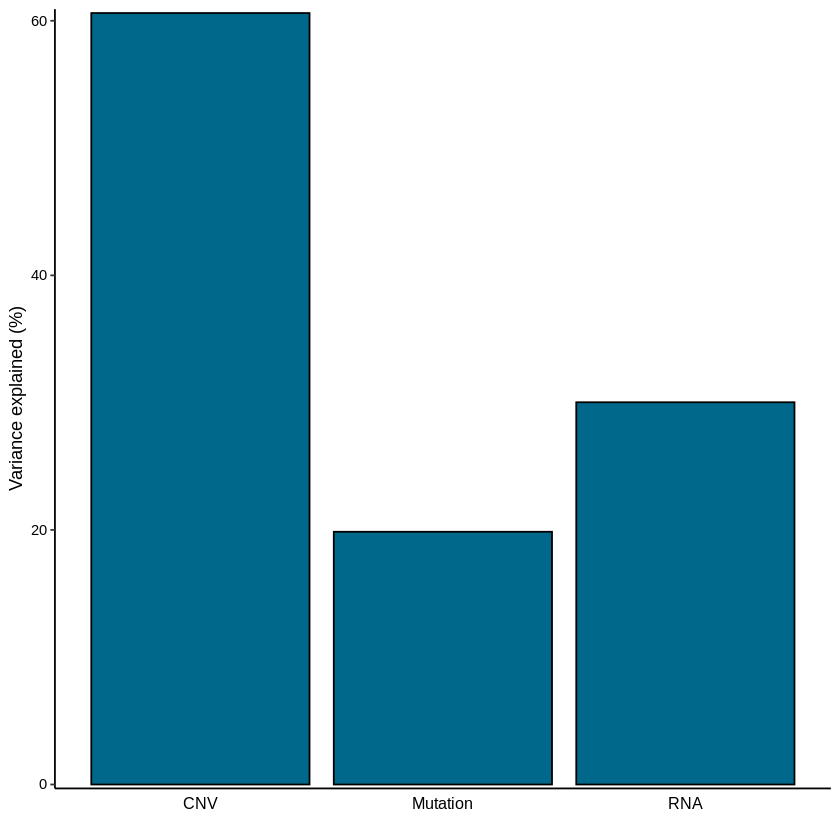

In [21]:
plot_variance_explained(MOFAobject, plot_total = T)[[2]]

In [22]:
head(covariates)

,dataset,age,gender,stage,pt,pn,pm,tnm,grade,msi,cimp,kras_mut,braf_mut,cms_label,osMo,osStat,rfsMo,rfsStat,sample
,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<lgl>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<int>,<lgl>,<lgl>,<chr>
TCGA.A6.2672,tcga,82,female,3,3,1,0,IIIB,NA,msi,CIMP.High,0,0,CMS1,16.536986,0,NA,NA,TCGA.A6.2672
TCGA.A6.3809,tcga,71,female,2,4,0,0,IIB/IIC,NA,msi,CIMP.High,NA,NA,CMS1,10.290411,0,NA,NA,TCGA.A6.3809
TCGA.A6.5661,tcga,80,female,2,3,0,0,IIA,NA,msi,CIMP.High,0,1,CMS1,10.060274,0,NA,NA,TCGA.A6.5661
TCGA.A6.5665,tcga,84,female,2,3,0,0,IIA,NA,msi,CIMP.High,0,1,CMS1,9.402740,0,NA,NA,TCGA.A6.5665
TCGA.A6.6653,tcga,82,male,1,2,0,0,I,NA,msi,CIMP.High,1,1,CMS1,2.958904,0,NA,NA,TCGA.A6.6653
TCGA.A6.6780,tcga,74,male,2,3,0,NA,IIA,NA,msi,CIMP.Low,0,0,CMS1,2.827397,0,NA,NA,TCGA.A6.6780


Warning message in correlate_factors_with_covariates(MOFAobject, covariates = c("age", :
“There are non-numeric values in the covariates data.frame, converting to numeric...”


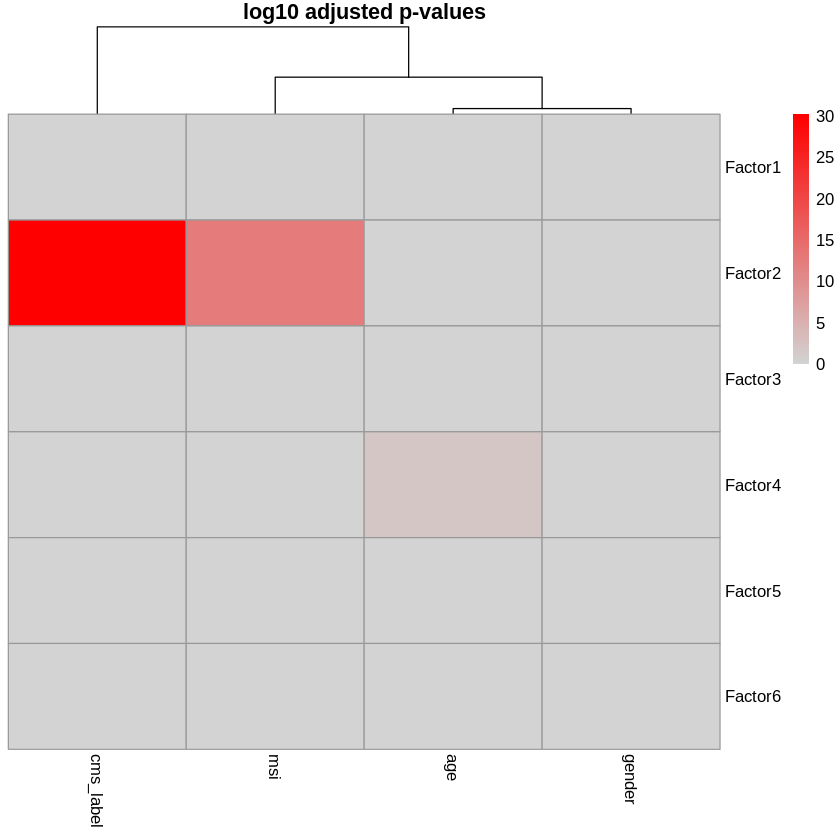

In [27]:
#install.packages('psych')
correlate_factors_with_covariates(MOFAobject,
                                  covariates = c("age", "gender", "cms_label",  "msi"),
                                  plot='log_pval')

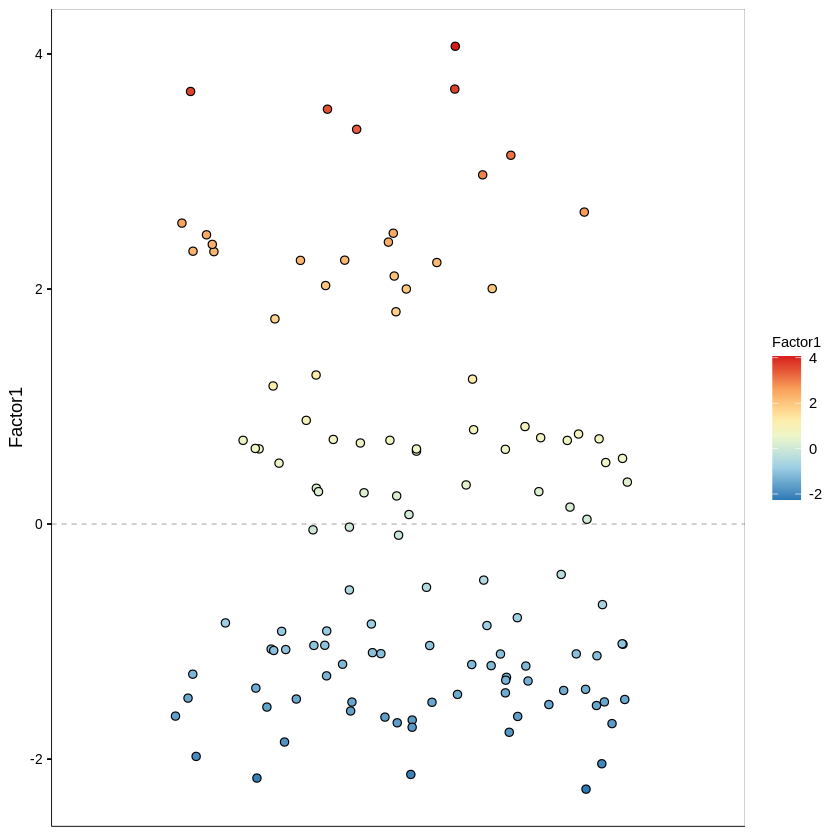

In [29]:
plot_factor(MOFAobject, 
factors=1,
color_by='Factor1')

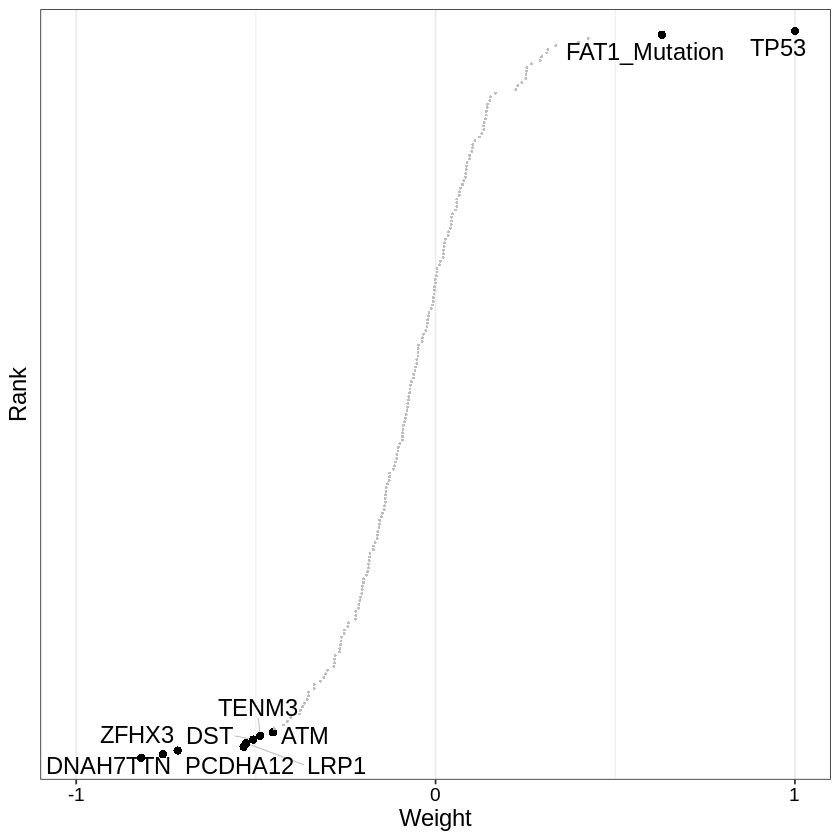

In [35]:
plot_weights(MOFAobject,
            view='Mutation',
            factor = 1,
            nfeatures = 10,
            scale = T
)

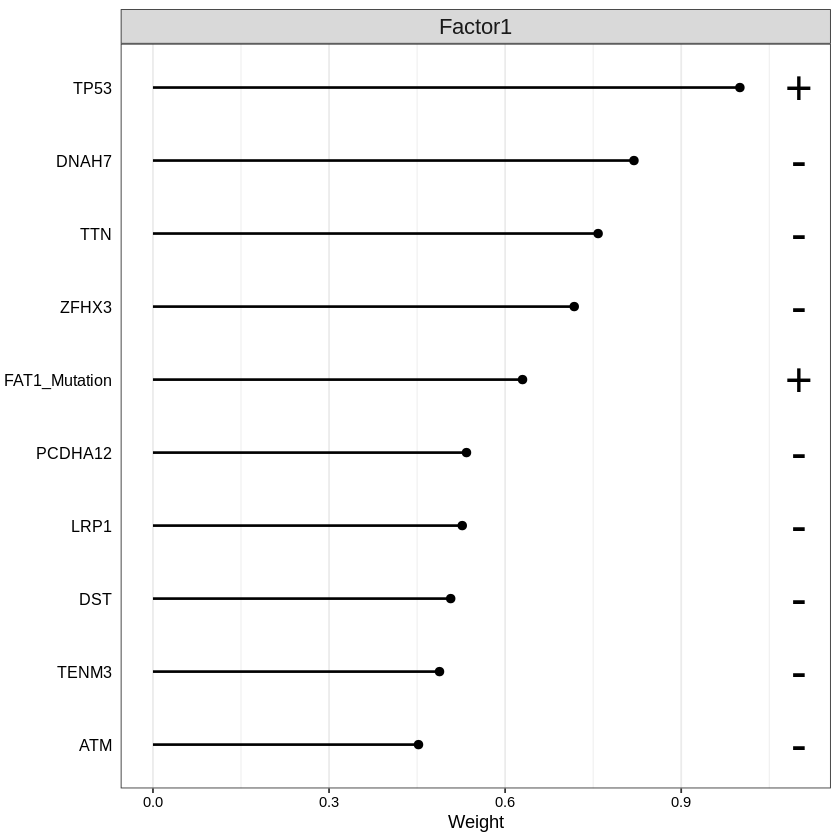

In [36]:
plot_top_weights(MOFAobject,
      view='Mutation',
      factor = 1,
      nfeatures = 10,
      scale = T)

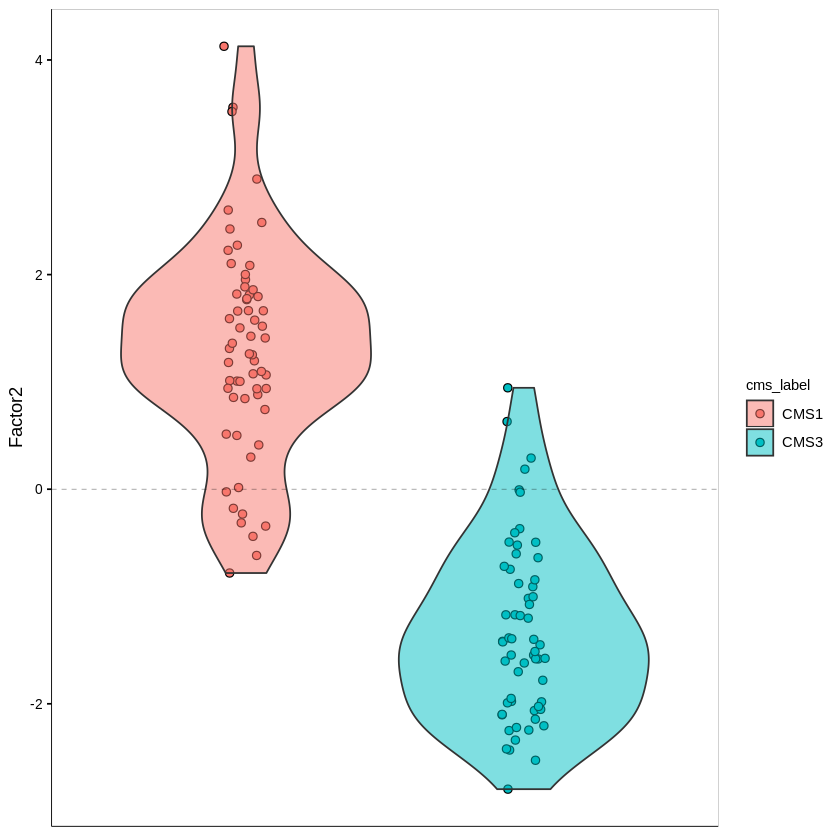

In [44]:
plot_factor(MOFAobject,
  factors = 2,
  color_by = 'cms_label',
  add_violin = TRUE,
  dodge = TRUE)

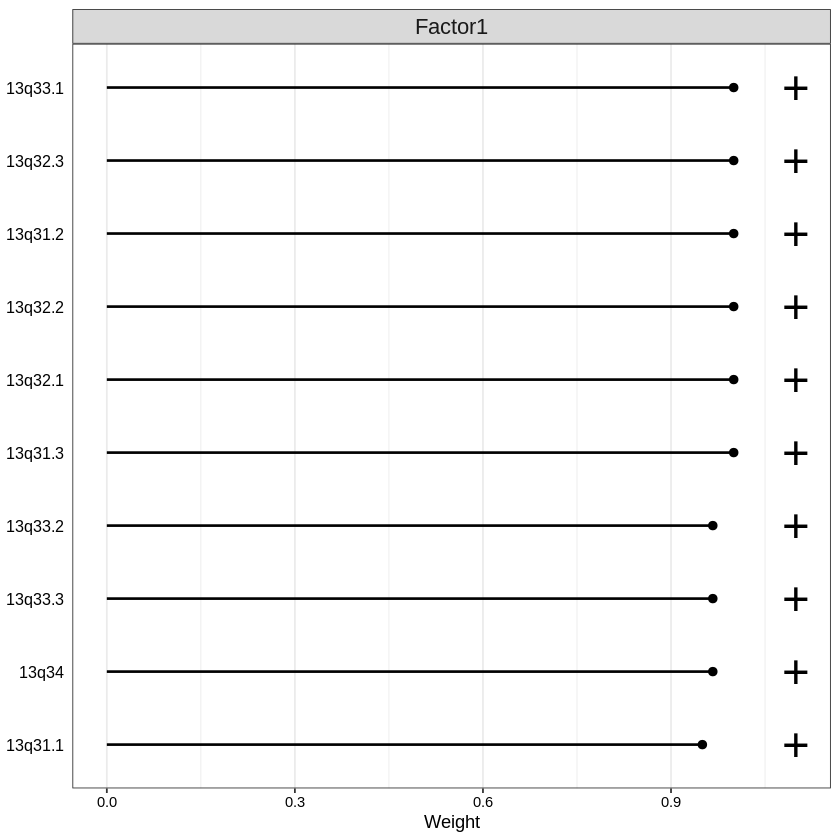

In [37]:
plot_top_weights(MOFAobject,
    view='CNV',
    factor = 1,
    nfeatures = 10,
    scale = T)


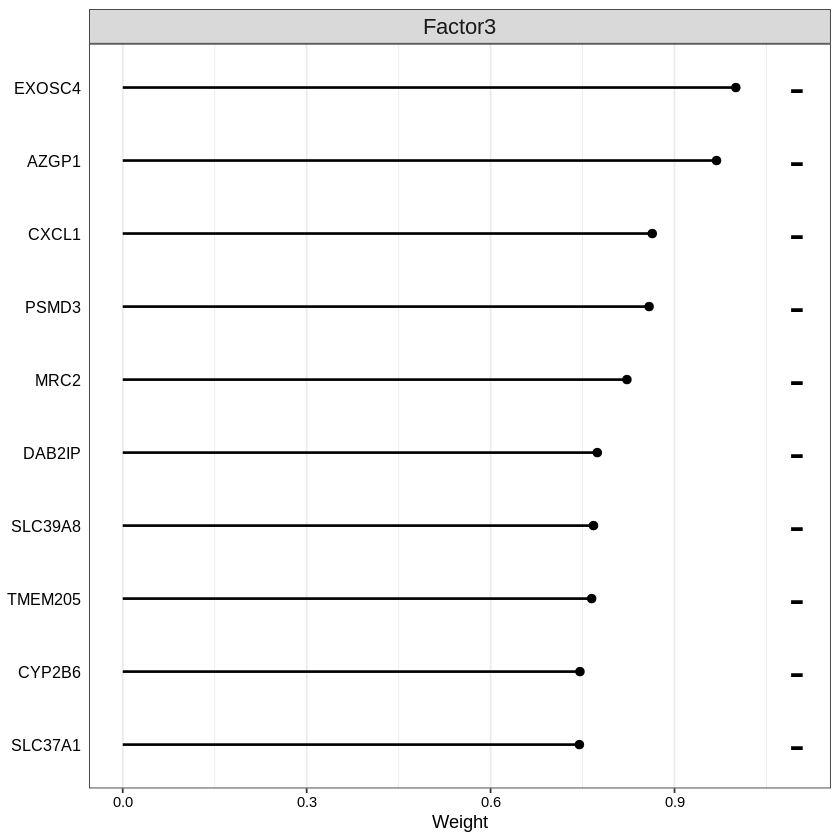

In [39]:
plot_top_weights(MOFAobject,
  view = 'RNA',
  factor = 3,
  nfeatures = 10,
  scale = T)

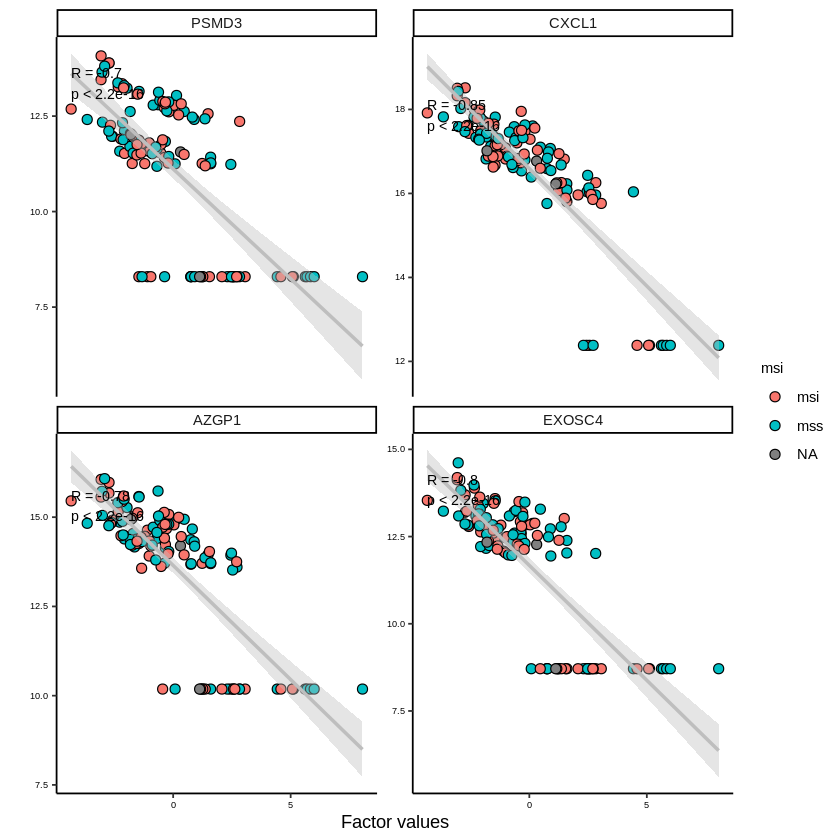

In [48]:
#install.packages('ggpubr')
plot_data_scatter(MOFAobject,
    view='RNA',
    factor=3,
    features=4,
    sign='negative',
    color_by='msi')

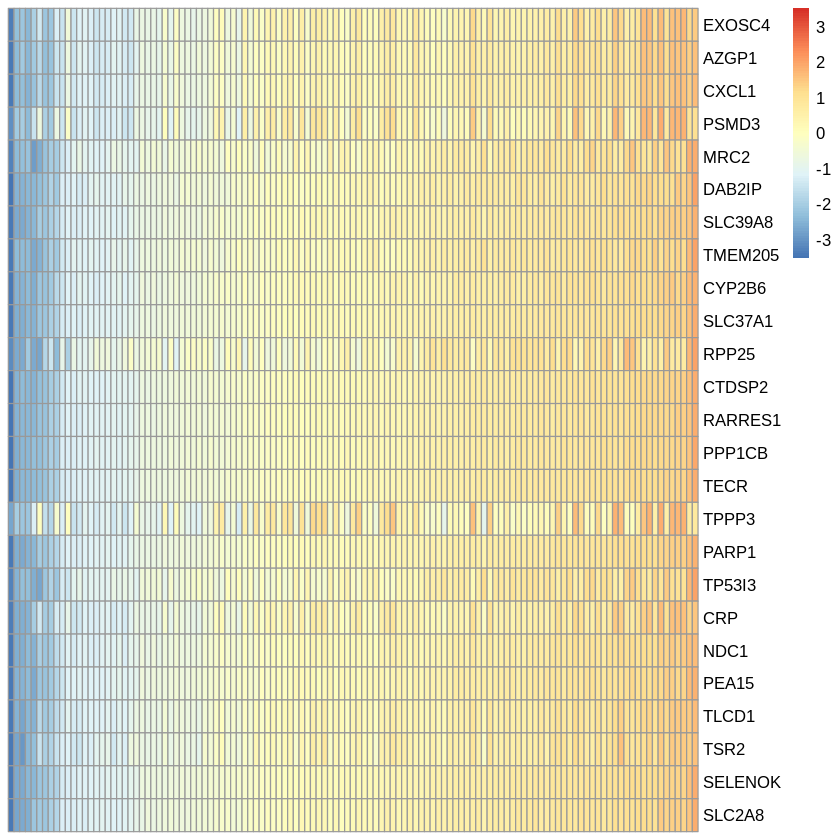

In [52]:
plot_data_heatmap(MOFAobject,
  view = 'RNA',
  factor = 3,
  features = 25,
  denoise = TRUE,
  cluster_rows = FALSE, cluster_cols = FALSE,
  show_rownames = TRUE, show_colnames = FALSE,
  scale = 'row')

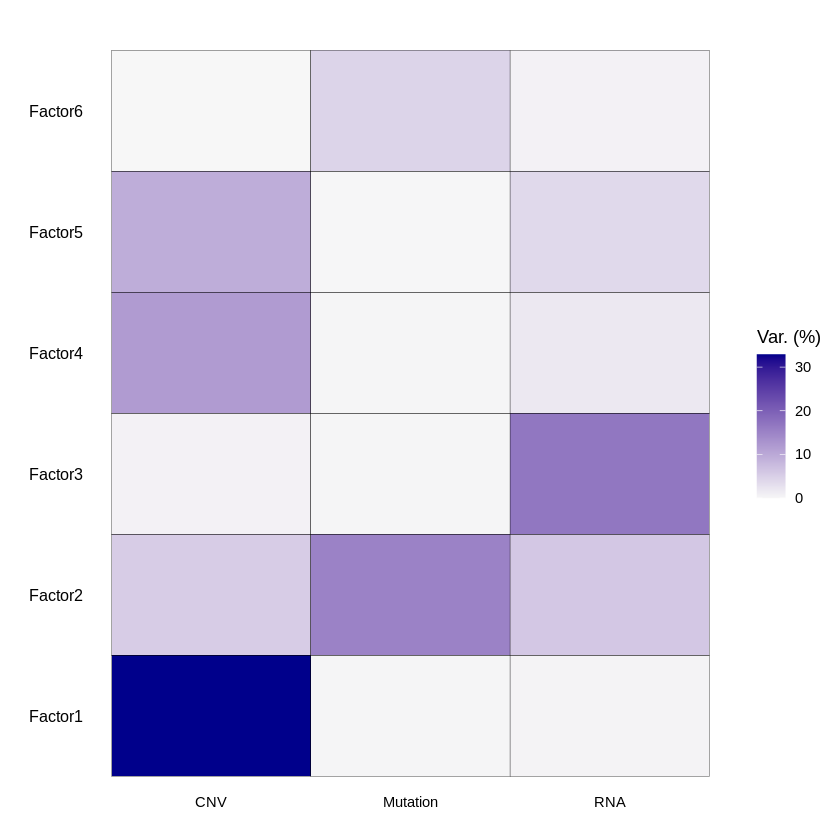

In [53]:
plot_variance_explained(MOFAobject)

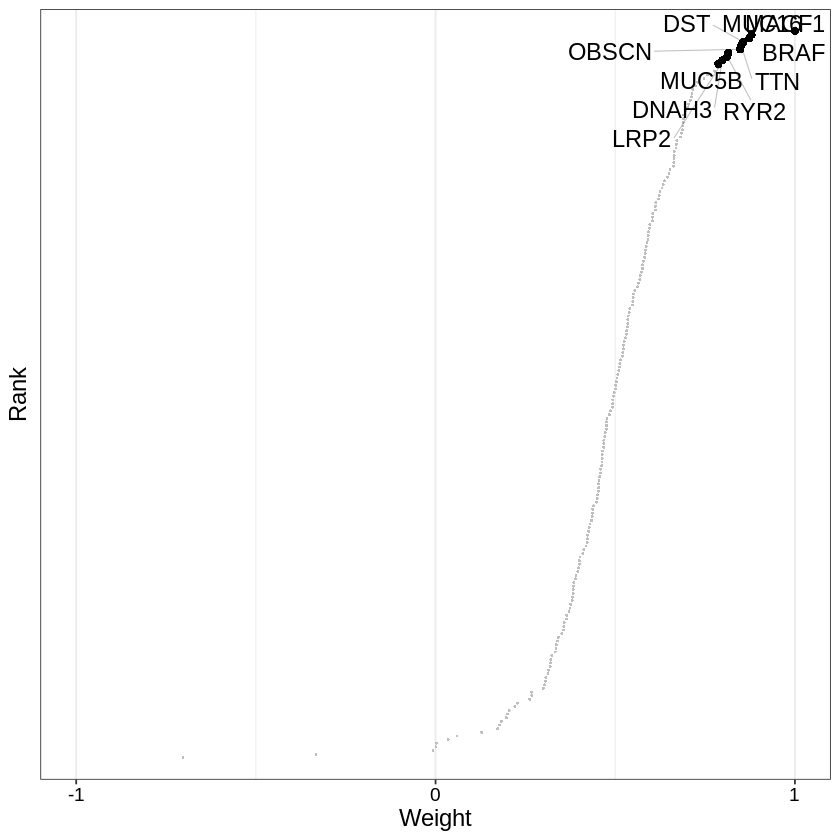

In [54]:
plot_weights(MOFAobject,
  view = 'Mutation',
  factor = 2,
  nfeatures = 10,
  abs = F)

Warning message:
“Removed 3 rows containing missing values (geom_point).”


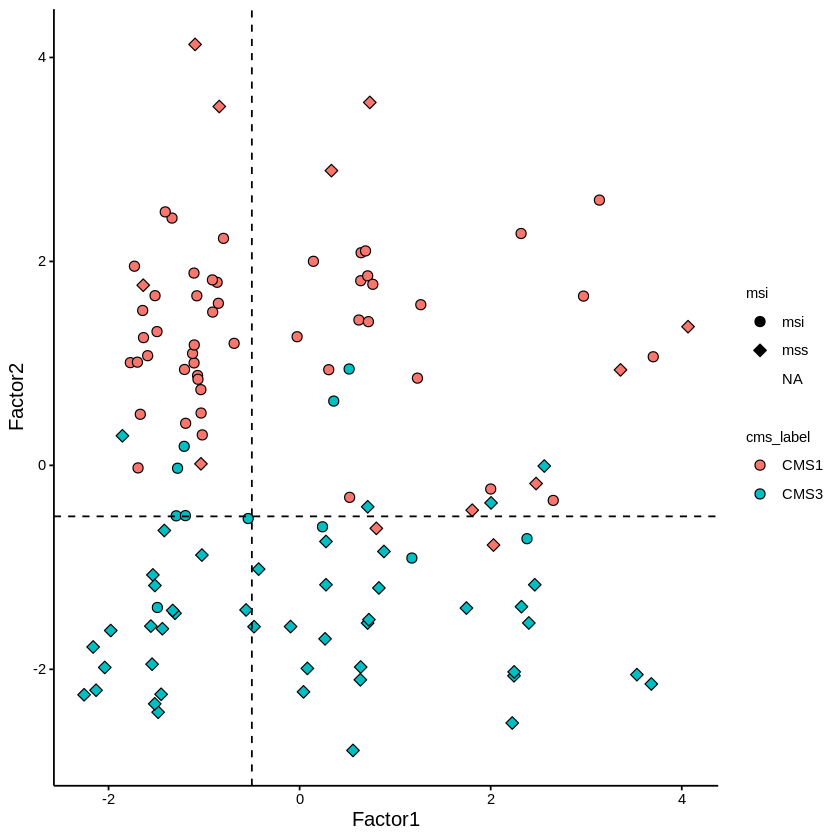

In [60]:
# combination of factors
plot_factors(MOFAobject,
    factors = c(1, 2),
    color_by = 'cms_label',
    shape_by = 'msi',
    dot_size = 2.5,
    show_missing = T) +
    geom_hline(yintercept = -0.5, linetype='dashed') +
    geom_vline(xintercept = (-0.5), linetype='dashed')    

In [59]:
as.data.frame(get_factors(MOFAobject, factors=c(1, 2))[[1]])

,Factor1,Factor2
,<dbl>,<dbl>
TCGA.A6.2672,1.26825306,1.57551147
TCGA.A6.3809,-0.68557149,1.19659301
TCGA.A6.5661,3.70136813,1.06489491
TCGA.A6.5665,-1.19285749,0.41258892
TCGA.A6.6653,-1.03152837,0.51327317
TCGA.A6.6780,-1.06807663,0.88134879
TCGA.AA.3492,-1.64283905,1.51899129
TCGA.AA.3502,-0.56083132,-1.41767258
TCGA.AA.3655,-1.02296196,-0.87944199


In [61]:
head(samples_metadata(MOFAobject))

,dataset,age,gender,stage,pt,pn,pm,tnm,grade,msi,cimp,kras_mut,braf_mut,cms_label,osMo,osStat,rfsMo,rfsStat,sample,group
,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<lgl>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<int>,<lgl>,<lgl>,<chr>,<chr>
TCGA.A6.2672,tcga,82,female,3,3,1,0,IIIB,NA,msi,CIMP.High,0,0,CMS1,16.536986,0,NA,NA,TCGA.A6.2672,group1
TCGA.A6.3809,tcga,71,female,2,4,0,0,IIB/IIC,NA,msi,CIMP.High,NA,NA,CMS1,10.290411,0,NA,NA,TCGA.A6.3809,group1
TCGA.A6.5661,tcga,80,female,2,3,0,0,IIA,NA,msi,CIMP.High,0,1,CMS1,10.060274,0,NA,NA,TCGA.A6.5661,group1
TCGA.A6.5665,tcga,84,female,2,3,0,0,IIA,NA,msi,CIMP.High,0,1,CMS1,9.402740,0,NA,NA,TCGA.A6.5665,group1
TCGA.A6.6653,tcga,82,male,1,2,0,0,I,NA,msi,CIMP.High,1,1,CMS1,2.958904,0,NA,NA,TCGA.A6.6653,group1
TCGA.A6.6780,tcga,74,male,2,3,0,NA,IIA,NA,msi,CIMP.Low,0,0,CMS1,2.827397,0,NA,NA,TCGA.A6.6780,group1
